In [1]:
import openreview
import pandas as pd
import datetime as date
import tqdm
import ast
from matplotlib import pyplot as plt

In [2]:
# df_all_notes = pd.read_csv('../data/submissions/df_all_notes.csv')
df_rr_politeness_score = pd.read_csv('../data/model_output/df_rr_politeness_score.csv')
df_author_profiles = pd.read_csv('../data/authors/df_author_profiles.csv')
df_submissions = pd.read_csv('../data/submissions/df_submissions.csv')
df_rr_all_features = pd.read_csv('../data/df_rr_all_features.csv')



In [3]:
df_author_profiles['gender']=df_author_profiles.gender.replace({'m':'Male',
                                    'M':'Male',
                                    'male':'Male',
                                    None:'Unspecified',
                                    '':'Unspecified',
                                    'Not Specified':'Unspecified',
                                    'female':'Female'})
#df_author_profiles.to_csv('../data/authors/df_author_profiles.csv')

In [4]:
df_author_profiles

year                      email                      id  number  \
0     2017       11112191@bjtu.edu.cn              ~Liu_Yang1     NaN   
1     2017       15112085@bjtu.edu.cn        ~MiaoMiao_Cheng1     NaN   
2     2017   AMagnani@walmartlabs.com    ~Alessandro_Magnani1     NaN   
3     2017   Francis.wyffels@UGent.be       ~Francis_wyffels1     NaN   
4     2017         Mohammadi@uk.ac.ir       ~Majid_Mohammadi1     NaN   
...    ...                        ...                     ...     ...   
8096  2019             zfw@pku.edu.cn         ~fangwei_zhong1     NaN   
8097  2019  zhangruimao@sensetime.com          ~Ruimao_Zhang1     NaN   
8098  2019    zhaotianyang@pku.edu.cn         ~Tianyang_Zhao1     NaN   
8099  2019        zhifengc@google.com          ~Zhifeng_Chen1     NaN   
8100  2019            zlipton@cmu.edu  ~Zachary_Chase_Lipton1     NaN   

            tcdate        tmdate  referent  packaging    invitation  \
0     1.512865e+12  1.563143e+12       NaN        NaN  ~/-/profiles   
1     1.512865e+12  1.512865e+12       NaN        NaN  ~/-/profiles   
2     1.512865e+12  1.563143e+12       NaN        NaN  ~/-/profiles   
3     1.512864e+12  1.512864e+12       NaN        NaN  ~/-/profiles   
4     1.512865e+12  1.512865e+12       NaN        NaN  ~/-/profiles   
...            ...           ...       ...        ...           ...   
8096  1.538071e+12  1.629267e+12       NaN        NaN  ~/-/profiles   
8097  1.538027e+12  1.621516e+12       NaN        NaN  ~/-/profiles   
8098  1.562864e+12  1.562864e+12       NaN        NaN  ~/-/profiles   
8099  1.562863e+12  1.637083e+12       NaN        NaN  ~/-/profiles   
8100  1.473703e+12  1.580932e+12       NaN        NaN  ~/-/profiles   

                                           readers  ...       gender  \
0                 ['OpenReview.net', '~Liu_Yang1']  ...  Unspecified   
1           ['OpenReview.net', '~MiaoMiao_Cheng1']  ...  Unspecified   
2       ['OpenReview.net', '~Alessandro_Magnani1']  ...  Unspecified   
3          ['OpenReview.net', '~Francis_wyffels1']  ...  Unspecified   
4          ['OpenReview.net', '~Majid_Mohammadi1']  ...  Unspecified   
...                                            ...  ...          ...   
8096         ['OpenReview.net', '~fangwei_zhong1']  ...         Male   
8097          ['OpenReview.net', '~Ruimao_Zhang1']  ...         Male   
8098         ['OpenReview.net', '~Tianyang_Zhao1']  ...  Unspecified   
8099          ['OpenReview.net', '~Zhifeng_Chen1']  ...         Male   
8100  ['OpenReview.net', '~Zachary_Chase_Lipton1']  ...  Unspecified   

                                               gscholar  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
8096  https://scholar.google.com/citations?user=ejDz...   
8097  https://scholar.google.com/citations?user=ZJwZ...   
8098                                                NaN   
8099                                                NaN   
8100  https://scholar.google.com/citations?user=MN9K...   

                       homepage orcid semanticScholar       location  \
0                           NaN   NaN             NaN          China   
1                           NaN   NaN             NaN          China   
2                           NaN   NaN             NaN  United States   
3                           NaN   NaN             NaN        Belgium   
4                           NaN   NaN             NaN           Iran   
...                         ...   ...             ...            ...   
8096                        NaN   NaN             NaN          China   
8097  http://zhangruimao.site/#   NaN             NaN          China   
8098                        NaN   NaN             NaN 

# This is to get the Keyword from the Submissions

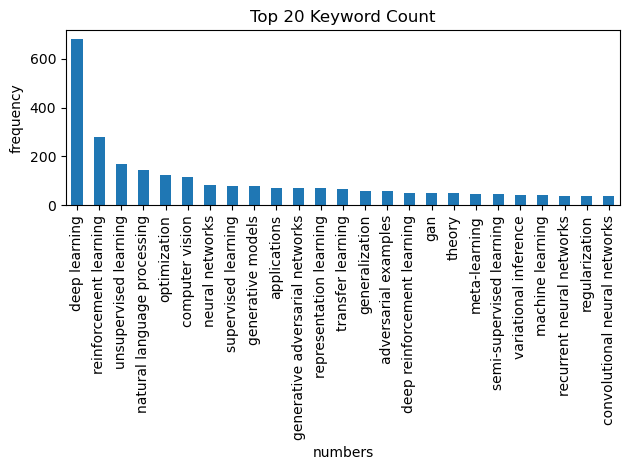

In [9]:
df_submissions.keywords.to_list()

list_keyword_list = [ast.literal_eval(list) for list in df_submissions.keywords.to_list()]

list_keywords = [item.lower() for sublist in list_keyword_list for item in sublist]


#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()



df = pd.DataFrame({'keywords': list_keywords})
df['keywords'].value_counts().nlargest(25).plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency',title='Top 20 Keyword Count')

plt.show()

In [13]:
len(set(list_keywords))

3883

# Get the gender from the profile of the Authors

In [44]:
def perecent_female_author(row):
    try:
        lst_authorids = ast.literal_eval(row['authorids'])
        int_author_number=len(lst_authorids)
        #print(lst_authorids)
    except:
        return None
    count = 0
    for authorid in lst_authorids:
        #print(authorid)
        try:
            gender_id = str(df_author_profiles[df_author_profiles['email'] == authorid].gender.values[0]).lower()
        except:
            return None
        #print(authorid," ",gender_id)
        if gender_id == 'female':
            count += 1
            #print(count)
        if gender_id == "unspecified":
            #print(gender_id)
            return None
    return count/int_author_number
    
def get_all_male_authors(row):
    try:
        lst_authorids = ast.literal_eval(row['authorids'])
        int_author_number=len(lst_authorids)
        #print(lst_authorids)
    except:
        return None
    count = 0
    for authorid in lst_authorids:
        #print(authorid)
        try:
            gender_id = str(df_author_profiles[df_author_profiles['email'] == authorid].gender.values[0]).lower()
        except:
            return None
        #print(authorid," ",gender_id)
        if gender_id == 'female':
            return 0
            #print(count)
        if gender_id == "unspecified":
            #print(gender_id)
            return None
    return 1   

def get_last_author_gender(row):
    try:
        last_author_email =str(row['last_author_email'])
        return str(df_author_profiles[df_author_profiles['email'] == last_author_email].gender.values[0]).lower()
    except:
        return None

def get_first_author_gender(row):
    try:
        first_author_email =str(row['first_author_email'])
        return str(df_author_profiles[df_author_profiles['email'] == first_author_email].gender.values[0]).lower()
    except:
        return None
    

In [45]:
test_row = df_submissions[df_submissions['forum']=="HJTzHtqee"]


test_row.apply(lambda x: perecent_female_author(x),axis=1)



t = '''
for i in test_row['authorids']:
    lst_authorids = ast.literal_eval(i)
    int_author_number=len(lst_authorids)
    count = 0
    for authorid in lst_authorids:
        gender_id = str(df_author_profiles[df_author_profiles['email'] == authorid].gender.values[0]).lower()

        if gender_id == 'female':
            count += 1
    out = count/int_author_number
print(out)'''

test_row.apply(lambda x: perecent_female_author(x),axis=1)

94    0.5
dtype: float64

In [37]:
tqdm.tqdm.pandas()

df_rr_all_features['gender_percent'] = df_rr_all_features.progress_apply(lambda x: perecent_female_author(x),axis = 1)
df_rr_all_features['last_author_gender'] = df_rr_all_features.progress_apply(lambda x: get_last_author_gender(x),axis = 1)

df_rr_all_features.to_csv('../data/df_rr_all_features.csv',index=False)

  1%|▍                                     | 278/22878 [00:00<00:22, 993.58it/s]

['larsson@cs.uchicago.edu', 'mmaire@ttic.edu', 'greg@ttic.edu']
larsson@cs.uchicago.edu
larsson@cs.uchicago.edu   male
mmaire@ttic.edu
mmaire@ttic.edu   male
greg@ttic.edu
greg@ttic.edu   male
['larsson@cs.uchicago.edu', 'mmaire@ttic.edu', 'greg@ttic.edu']
larsson@cs.uchicago.edu
larsson@cs.uchicago.edu   male
mmaire@ttic.edu
mmaire@ttic.edu   male
greg@ttic.edu
greg@ttic.edu   male
['larsson@cs.uchicago.edu', 'mmaire@ttic.edu', 'greg@ttic.edu']
larsson@cs.uchicago.edu
larsson@cs.uchicago.edu   male
mmaire@ttic.edu
mmaire@ttic.edu   male
greg@ttic.edu
greg@ttic.edu   male
['larsson@cs.uchicago.edu', 'mmaire@ttic.edu', 'greg@ttic.edu']
larsson@cs.uchicago.edu
larsson@cs.uchicago.edu   male
mmaire@ttic.edu
mmaire@ttic.edu   male
greg@ttic.edu
greg@ttic.edu   male
['larsson@cs.uchicago.edu', 'mmaire@ttic.edu', 'greg@ttic.edu']
larsson@cs.uchicago.edu
larsson@cs.uchicago.edu   male
mmaire@ttic.edu
mmaire@ttic.edu   male
greg@ttic.edu
greg@ttic.edu   male
['larsson@cs.uchicago.edu', 'mmaire

  2%|▊                                    | 522/22878 [00:00<00:19, 1139.41it/s]

['daniel.freeman@berkeley.edu', 'bruna@cims.nyu.edu']
daniel.freeman@berkeley.edu
daniel.freeman@berkeley.edu   male
bruna@cims.nyu.edu
bruna@cims.nyu.edu   male
['daniel.freeman@berkeley.edu', 'bruna@cims.nyu.edu']
daniel.freeman@berkeley.edu
daniel.freeman@berkeley.edu   male
bruna@cims.nyu.edu
bruna@cims.nyu.edu   male
['szhai2@binghamton.edu', 'chengyu@us.ibm.com', 'rsferis@us.ibm.com', 'zhongfei@cs.binghamton.edu']
szhai2@binghamton.edu
szhai2@binghamton.edu   male
chengyu@us.ibm.com
chengyu@us.ibm.com   male
rsferis@us.ibm.com
rsferis@us.ibm.com   male
zhongfei@cs.binghamton.edu
zhongfei@cs.binghamton.edu   male
['szhai2@binghamton.edu', 'chengyu@us.ibm.com', 'rsferis@us.ibm.com', 'zhongfei@cs.binghamton.edu']
szhai2@binghamton.edu
szhai2@binghamton.edu   male
chengyu@us.ibm.com
chengyu@us.ibm.com   male
rsferis@us.ibm.com
rsferis@us.ibm.com   male
zhongfei@cs.binghamton.edu
zhongfei@cs.binghamton.edu   male
['szhai2@binghamton.edu', 'chengyu@us.ibm.com', 'rsferis@us.ibm.com', 'z

  4%|█▌                                   | 995/22878 [00:00<00:18, 1170.22it/s]

['eeyjolfs@caltech.edu', 'bransonk@janelia.hhmi.org', 'yyue@caltech.edu', 'perona@caltech.edu']
eeyjolfs@caltech.edu
eeyjolfs@caltech.edu   female
1
bransonk@janelia.hhmi.org
bransonk@janelia.hhmi.org   female
2
yyue@caltech.edu
yyue@caltech.edu   male
perona@caltech.edu
perona@caltech.edu   male
['eeyjolfs@caltech.edu', 'bransonk@janelia.hhmi.org', 'yyue@caltech.edu', 'perona@caltech.edu']
eeyjolfs@caltech.edu
eeyjolfs@caltech.edu   female
1
bransonk@janelia.hhmi.org
bransonk@janelia.hhmi.org   female
2
yyue@caltech.edu
yyue@caltech.edu   male
perona@caltech.edu
perona@caltech.edu   male
['eeyjolfs@caltech.edu', 'bransonk@janelia.hhmi.org', 'yyue@caltech.edu', 'perona@caltech.edu']
eeyjolfs@caltech.edu
eeyjolfs@caltech.edu   female
1
bransonk@janelia.hhmi.org
bransonk@janelia.hhmi.org   female
2
yyue@caltech.edu
yyue@caltech.edu   male
perona@caltech.edu
perona@caltech.edu   male
['eeyjolfs@caltech.edu', 'bransonk@janelia.hhmi.org', 'yyue@caltech.edu', 'perona@caltech.edu']
eeyjolfs@c

  6%|██▏                                 | 1392/22878 [00:01<00:16, 1290.13it/s]

amiceli@inf.ed.ac.uk   unspecified
unspecified
['amiceli@inf.ed.ac.uk']
amiceli@inf.ed.ac.uk
amiceli@inf.ed.ac.uk   unspecified
unspecified
['amiceli@inf.ed.ac.uk']
amiceli@inf.ed.ac.uk
amiceli@inf.ed.ac.uk   unspecified
unspecified
['amiceli@inf.ed.ac.uk']
amiceli@inf.ed.ac.uk
amiceli@inf.ed.ac.uk   unspecified
unspecified
['ngp5056@cse.psu.edu', 'abadi@google.com', 'ulfar@google.com', 'ian@openai.com', 'kunal@google.com']
ngp5056@cse.psu.edu
ngp5056@cse.psu.edu   male
abadi@google.com
abadi@google.com   unspecified
unspecified
['ngp5056@cse.psu.edu', 'abadi@google.com', 'ulfar@google.com', 'ian@openai.com', 'kunal@google.com']
ngp5056@cse.psu.edu
ngp5056@cse.psu.edu   male
abadi@google.com
abadi@google.com   unspecified
unspecified
['ngp5056@cse.psu.edu', 'abadi@google.com', 'ulfar@google.com', 'ian@openai.com', 'kunal@google.com']
ngp5056@cse.psu.edu
ngp5056@cse.psu.edu   male
abadi@google.com
abadi@google.com   unspecified
unspecified
['ehoffer@tx.technion.ac.il', 'nailon@cs.techni

  7%|██▌                                 | 1642/22878 [00:01<00:18, 1168.02it/s]

['edwin.webmail@gmail.com']
edwin.webmail@gmail.com
edwin.webmail@gmail.com   male
['zhucz13@mails.tsinghua.edu.cn', 'songhan@stanford.edu', 'huizi@stanford.edu', 'dally@stanford.edu']
zhucz13@mails.tsinghua.edu.cn
['zhucz13@mails.tsinghua.edu.cn', 'songhan@stanford.edu', 'huizi@stanford.edu', 'dally@stanford.edu']
zhucz13@mails.tsinghua.edu.cn
['zhucz13@mails.tsinghua.edu.cn', 'songhan@stanford.edu', 'huizi@stanford.edu', 'dally@stanford.edu']
zhucz13@mails.tsinghua.edu.cn
['zhucz13@mails.tsinghua.edu.cn', 'songhan@stanford.edu', 'huizi@stanford.edu', 'dally@stanford.edu']
zhucz13@mails.tsinghua.edu.cn
['zhucz13@mails.tsinghua.edu.cn', 'songhan@stanford.edu', 'huizi@stanford.edu', 'dally@stanford.edu']
zhucz13@mails.tsinghua.edu.cn
['zhucz13@mails.tsinghua.edu.cn', 'songhan@stanford.edu', 'huizi@stanford.edu', 'dally@stanford.edu']
zhucz13@mails.tsinghua.edu.cn
['forresti@eecs.berkeley.edu', 'songhan@stanford.edu', 'moskewcz@eecs.berkeley.edu', 'kashraf@eecs.berkeley.edu', 'dally@stan

  9%|███▏                                | 2033/22878 [00:01<00:17, 1195.85it/s]

['sword.york@gmail.com', 'zhzhang@math.pku.edu.cn']
sword.york@gmail.com
sword.york@gmail.com   male
zhzhang@math.pku.edu.cn
zhzhang@math.pku.edu.cn   male
['sword.york@gmail.com', 'zhzhang@math.pku.edu.cn']
sword.york@gmail.com
sword.york@gmail.com   male
zhzhang@math.pku.edu.cn
zhzhang@math.pku.edu.cn   male
['sword.york@gmail.com', 'zhzhang@math.pku.edu.cn']
sword.york@gmail.com
sword.york@gmail.com   male
zhzhang@math.pku.edu.cn
zhzhang@math.pku.edu.cn   male
['sword.york@gmail.com', 'zhzhang@math.pku.edu.cn']
sword.york@gmail.com
sword.york@gmail.com   male
zhzhang@math.pku.edu.cn
zhzhang@math.pku.edu.cn   male
['sword.york@gmail.com', 'zhzhang@math.pku.edu.cn']
sword.york@gmail.com
sword.york@gmail.com   male
zhzhang@math.pku.edu.cn
zhzhang@math.pku.edu.cn   male
['dyogatama@google.com', 'pblunsom@google.com', 'cdyer@google.com', 'etg@google.com', 'lingwang@google.com']
dyogatama@google.com
dyogatama@google.com   unspecified
unspecified
['dyogatama@google.com', 'pblunsom@google.c

 11%|███▊                                | 2410/22878 [00:02<00:17, 1201.35it/s]

['fredrikj@mit.edu', 'kallus@cornell.edu', 'urish22@gmail.com', 'dsontag@csail.mit.edu']
fredrikj@mit.edu
fredrikj@mit.edu   male
kallus@cornell.edu
kallus@cornell.edu   unspecified
unspecified
['taco.cohen@gmail.com', 'geiger.mario@gmail.com', 'jonas.koehler.ks@gmail.com', 'm.welling@uva.nl']
taco.cohen@gmail.com
taco.cohen@gmail.com   male
geiger.mario@gmail.com
geiger.mario@gmail.com   unspecified
unspecified
['taco.cohen@gmail.com', 'geiger.mario@gmail.com', 'jonas.koehler.ks@gmail.com', 'm.welling@uva.nl']
taco.cohen@gmail.com
taco.cohen@gmail.com   male
geiger.mario@gmail.com
geiger.mario@gmail.com   unspecified
unspecified
['taco.cohen@gmail.com', 'geiger.mario@gmail.com', 'jonas.koehler.ks@gmail.com', 'm.welling@uva.nl']
taco.cohen@gmail.com
taco.cohen@gmail.com   male
geiger.mario@gmail.com
geiger.mario@gmail.com   unspecified
unspecified
['taco.cohen@gmail.com', 'geiger.mario@gmail.com', 'jonas.koehler.ks@gmail.com', 'm.welling@uva.nl']
taco.cohen@gmail.com
taco.cohen@gmail.c

 12%|████▎                               | 2772/22878 [00:02<00:16, 1194.89it/s]

['quan.hovuong@gmail.com', 'yiming.zhang@nyu.edu', 'kenny.song@nyu.edu', 'xygong@mit.edu', 'keithwross@nyu.edu']
quan.hovuong@gmail.com
quan.hovuong@gmail.com   male
yiming.zhang@nyu.edu
yiming.zhang@nyu.edu   male
kenny.song@nyu.edu
kenny.song@nyu.edu   unspecified
unspecified
['quan.hovuong@gmail.com', 'yiming.zhang@nyu.edu', 'kenny.song@nyu.edu', 'xygong@mit.edu', 'keithwross@nyu.edu']
quan.hovuong@gmail.com
quan.hovuong@gmail.com   male
yiming.zhang@nyu.edu
yiming.zhang@nyu.edu   male
kenny.song@nyu.edu
kenny.song@nyu.edu   unspecified
unspecified
['msch@mit.edu', 'smerity@smerity.com', 'james.bradbury@salesforce.com', 'richard@socher.org']
msch@mit.edu
msch@mit.edu   unspecified
unspecified
['msch@mit.edu', 'smerity@smerity.com', 'james.bradbury@salesforce.com', 'richard@socher.org']
msch@mit.edu
msch@mit.edu   unspecified
unspecified
['msch@mit.edu', 'smerity@smerity.com', 'james.bradbury@salesforce.com', 'richard@socher.org']
msch@mit.edu
msch@mit.edu   unspecified
unspecified
[

 14%|████▉                               | 3133/22878 [00:02<00:18, 1063.32it/s]

['psprechmann@google.com', 'sidmj@google.com', 'jwrae@google.com', 'apritzel@google.com', 'adriap@google.com', 'buria@google.com', 'vinyals@google.com', 'dhcontact@google.com', 'razp@google.com', 'cblundell@google.com']
psprechmann@google.com
psprechmann@google.com   unspecified
unspecified
['psprechmann@google.com', 'sidmj@google.com', 'jwrae@google.com', 'apritzel@google.com', 'adriap@google.com', 'buria@google.com', 'vinyals@google.com', 'dhcontact@google.com', 'razp@google.com', 'cblundell@google.com']
psprechmann@google.com
psprechmann@google.com   unspecified
unspecified
['psprechmann@google.com', 'sidmj@google.com', 'jwrae@google.com', 'apritzel@google.com', 'adriap@google.com', 'buria@google.com', 'vinyals@google.com', 'dhcontact@google.com', 'razp@google.com', 'cblundell@google.com']
psprechmann@google.com
psprechmann@google.com   unspecified
unspecified
['psprechmann@google.com', 'sidmj@google.com', 'jwrae@google.com', 'apritzel@google.com', 'adriap@google.com', 'buria@google

 15%|█████▍                              | 3470/22878 [00:03<00:18, 1047.79it/s]

['sjoerd@idsia.ch', 'mbchang@berkeley.edu', 'klaus@idsia.ch', 'juergen@idsia.ch']
sjoerd@idsia.ch
sjoerd@idsia.ch   male
mbchang@berkeley.edu
mbchang@berkeley.edu   male
klaus@idsia.ch
klaus@idsia.ch   male
juergen@idsia.ch
juergen@idsia.ch   male
['sjoerd@idsia.ch', 'mbchang@berkeley.edu', 'klaus@idsia.ch', 'juergen@idsia.ch']
sjoerd@idsia.ch
sjoerd@idsia.ch   male
mbchang@berkeley.edu
mbchang@berkeley.edu   male
klaus@idsia.ch
klaus@idsia.ch   male
juergen@idsia.ch
juergen@idsia.ch   male
['sjoerd@idsia.ch', 'mbchang@berkeley.edu', 'klaus@idsia.ch', 'juergen@idsia.ch']
sjoerd@idsia.ch
sjoerd@idsia.ch   male
mbchang@berkeley.edu
mbchang@berkeley.edu   male
klaus@idsia.ch
klaus@idsia.ch   male
juergen@idsia.ch
juergen@idsia.ch   male
['sjoerd@idsia.ch', 'mbchang@berkeley.edu', 'klaus@idsia.ch', 'juergen@idsia.ch']
sjoerd@idsia.ch
sjoerd@idsia.ch   male
mbchang@berkeley.edu
mbchang@berkeley.edu   male
klaus@idsia.ch
klaus@idsia.ch   male
juergen@idsia.ch
juergen@idsia.ch   male
['sjoerd

 17%|██████▏                             | 3960/22878 [00:03<00:16, 1130.62it/s]

['victor.campos@bsc.es', 'bjou@google.com', 'xavier.giro@upc.edu', 'jordi.torres@bsc.es', 'shih.fu.chang@columbia.edu']
victor.campos@bsc.es
victor.campos@bsc.es   male
bjou@google.com
bjou@google.com   male
xavier.giro@upc.edu
xavier.giro@upc.edu   male
jordi.torres@bsc.es
jordi.torres@bsc.es   unspecified
unspecified
['vsv1g12@soton.ac.uk', 'apb@soton.ac.uk']
vsv1g12@soton.ac.uk
vsv1g12@soton.ac.uk   unspecified
unspecified
['vsv1g12@soton.ac.uk', 'apb@soton.ac.uk']
vsv1g12@soton.ac.uk
vsv1g12@soton.ac.uk   unspecified
unspecified
['vsv1g12@soton.ac.uk', 'apb@soton.ac.uk']
vsv1g12@soton.ac.uk
vsv1g12@soton.ac.uk   unspecified
unspecified
['kbwang@ucdavis.edu', 'risin@microsoft.com', 'su@cs.ucdavis.edu']
kbwang@ucdavis.edu
kbwang@ucdavis.edu   unspecified
unspecified
['kbwang@ucdavis.edu', 'risin@microsoft.com', 'su@cs.ucdavis.edu']
kbwang@ucdavis.edu
kbwang@ucdavis.edu   unspecified
unspecified
['kbwang@ucdavis.edu', 'risin@microsoft.com', 'su@cs.ucdavis.edu']
kbwang@ucdavis.edu
kbwa

 19%|██████▉                              | 4310/22878 [00:03<00:18, 987.36it/s]

['costis@mit.edu', 'ailyas@mit.edu', 'vasy@microsoft.com', 'haoyangz@mit.edu']
costis@mit.edu
costis@mit.edu   male
ailyas@mit.edu
ailyas@mit.edu   male
vasy@microsoft.com
vasy@microsoft.com   unspecified
unspecified
['costis@mit.edu', 'ailyas@mit.edu', 'vasy@microsoft.com', 'haoyangz@mit.edu']
costis@mit.edu
costis@mit.edu   male
ailyas@mit.edu
ailyas@mit.edu   male
vasy@microsoft.com
vasy@microsoft.com   unspecified
unspecified
['costis@mit.edu', 'ailyas@mit.edu', 'vasy@microsoft.com', 'haoyangz@mit.edu']
costis@mit.edu
costis@mit.edu   male
ailyas@mit.edu
ailyas@mit.edu   male
vasy@microsoft.com
vasy@microsoft.com   unspecified
unspecified
['costis@mit.edu', 'ailyas@mit.edu', 'vasy@microsoft.com', 'haoyangz@mit.edu']
costis@mit.edu
costis@mit.edu   male
ailyas@mit.edu
ailyas@mit.edu   male
vasy@microsoft.com
vasy@microsoft.com   unspecified
unspecified
['costis@mit.edu', 'ailyas@mit.edu', 'vasy@microsoft.com', 'haoyangz@mit.edu']
costis@mit.edu
costis@mit.edu   male
ailyas@mit.edu
a

 20%|███████▎                            | 4672/22878 [00:04<00:17, 1056.99it/s]

['lukas.balles@tuebingen.mpg.de', 'ph@tue.mpg.de']
lukas.balles@tuebingen.mpg.de
lukas.balles@tuebingen.mpg.de   male
ph@tue.mpg.de
ph@tue.mpg.de   male
['ff2316@columbia.edu', 'garud@ieor.columbia.edu']
ff2316@columbia.edu
ff2316@columbia.edu   male
garud@ieor.columbia.edu
garud@ieor.columbia.edu   unspecified
unspecified
['ff2316@columbia.edu', 'garud@ieor.columbia.edu']
ff2316@columbia.edu
ff2316@columbia.edu   male
garud@ieor.columbia.edu
garud@ieor.columbia.edu   unspecified
unspecified
['ff2316@columbia.edu', 'garud@ieor.columbia.edu']
ff2316@columbia.edu
ff2316@columbia.edu   male
garud@ieor.columbia.edu
garud@ieor.columbia.edu   unspecified
unspecified
['ff2316@columbia.edu', 'garud@ieor.columbia.edu']
ff2316@columbia.edu
ff2316@columbia.edu   male
garud@ieor.columbia.edu
garud@ieor.columbia.edu   unspecified
unspecified
['ff2316@columbia.edu', 'garud@ieor.columbia.edu']
ff2316@columbia.edu
ff2316@columbia.edu   male
garud@ieor.columbia.edu
garud@ieor.columbia.edu   unspecified

 22%|███████▊                            | 4932/22878 [00:04<00:16, 1077.31it/s]

['sebastian.nowozin@microsoft.com']
sebastian.nowozin@microsoft.com
sebastian.nowozin@microsoft.com   male
['sebastian.nowozin@microsoft.com']
sebastian.nowozin@microsoft.com
sebastian.nowozin@microsoft.com   male
['sebastian.nowozin@microsoft.com']
sebastian.nowozin@microsoft.com
sebastian.nowozin@microsoft.com   male
['sebastian.nowozin@microsoft.com']
sebastian.nowozin@microsoft.com
sebastian.nowozin@microsoft.com   male
['sebastian.nowozin@microsoft.com']
sebastian.nowozin@microsoft.com
sebastian.nowozin@microsoft.com   male
['sebastian.nowozin@microsoft.com']
sebastian.nowozin@microsoft.com
sebastian.nowozin@microsoft.com   male
['sebastian.nowozin@microsoft.com']
sebastian.nowozin@microsoft.com
sebastian.nowozin@microsoft.com   male
['sebastian.nowozin@microsoft.com']
sebastian.nowozin@microsoft.com
sebastian.nowozin@microsoft.com   male
['alex.peys@gmail.com', 'alerer@fb.com']
alex.peys@gmail.com
alex.peys@gmail.com   male
alerer@fb.com
alerer@fb.com   male
['alex.peys@gmail.com

 23%|████████▎                           | 5273/22878 [00:04<00:16, 1063.68it/s]

['tj@cs.cornell.edu', 'adswamin@microsoft.com', 'derijke@uva.nl']
tj@cs.cornell.edu
tj@cs.cornell.edu   male
adswamin@microsoft.com
adswamin@microsoft.com   male
derijke@uva.nl
derijke@uva.nl   unspecified
unspecified
['tj@cs.cornell.edu', 'adswamin@microsoft.com', 'derijke@uva.nl']
tj@cs.cornell.edu
tj@cs.cornell.edu   male
adswamin@microsoft.com
adswamin@microsoft.com   male
derijke@uva.nl
derijke@uva.nl   unspecified
unspecified
['jan.kukacka@tum.de', 'vladimir.golkov@tum.de', 'cremers@tum.de']
jan.kukacka@tum.de
jan.kukacka@tum.de   male
vladimir.golkov@tum.de
vladimir.golkov@tum.de   male
cremers@tum.de
cremers@tum.de   male
['jan.kukacka@tum.de', 'vladimir.golkov@tum.de', 'cremers@tum.de']
jan.kukacka@tum.de
jan.kukacka@tum.de   male
vladimir.golkov@tum.de
vladimir.golkov@tum.de   male
cremers@tum.de
cremers@tum.de   male
['jan.kukacka@tum.de', 'vladimir.golkov@tum.de', 'cremers@tum.de']
jan.kukacka@tum.de
jan.kukacka@tum.de   male
vladimir.golkov@tum.de
vladimir.golkov@tum.de   

 25%|████████▊                           | 5613/22878 [00:05<00:16, 1062.49it/s]

['dinghan.shen@duke.edu', 'guoyin.wang@duke.edu', 'wenlin.wang@duke.edu', 'renqiang@nec-labs.com', 'qinliang.su@duke.edu', 'yizhe.zhang@duke.edu', 'ricardo.henao@duke.edu', 'lcarin@duke.edu']
dinghan.shen@duke.edu
dinghan.shen@duke.edu   male
guoyin.wang@duke.edu
guoyin.wang@duke.edu   male
wenlin.wang@duke.edu
wenlin.wang@duke.edu   male
renqiang@nec-labs.com
renqiang@nec-labs.com   male
qinliang.su@duke.edu
qinliang.su@duke.edu   male
yizhe.zhang@duke.edu
['dinghan.shen@duke.edu', 'guoyin.wang@duke.edu', 'wenlin.wang@duke.edu', 'renqiang@nec-labs.com', 'qinliang.su@duke.edu', 'yizhe.zhang@duke.edu', 'ricardo.henao@duke.edu', 'lcarin@duke.edu']
dinghan.shen@duke.edu
dinghan.shen@duke.edu   male
guoyin.wang@duke.edu
guoyin.wang@duke.edu   male
wenlin.wang@duke.edu
wenlin.wang@duke.edu   male
renqiang@nec-labs.com
renqiang@nec-labs.com   male
qinliang.su@duke.edu
qinliang.su@duke.edu   male
yizhe.zhang@duke.edu
['irinah@google.com', 'sonnerat@google.com', 'lmatthey@google.com', 'arkap@g

 26%|█████████▎                          | 5934/22878 [00:05<00:16, 1021.26it/s]

['abhsinha@adobe.com', 'akb@adobe.com', 'msarkar@adobe.com', 'kbalaji@adobe.com']
abhsinha@adobe.com
abhsinha@adobe.com   male
akb@adobe.com
akb@adobe.com   unspecified
unspecified
['abhsinha@adobe.com', 'akb@adobe.com', 'msarkar@adobe.com', 'kbalaji@adobe.com']
abhsinha@adobe.com
abhsinha@adobe.com   male
akb@adobe.com
akb@adobe.com   unspecified
unspecified
['abhsinha@adobe.com', 'akb@adobe.com', 'msarkar@adobe.com', 'kbalaji@adobe.com']
abhsinha@adobe.com
abhsinha@adobe.com   male
akb@adobe.com
akb@adobe.com   unspecified
unspecified
['abhsinha@adobe.com', 'akb@adobe.com', 'msarkar@adobe.com', 'kbalaji@adobe.com']
abhsinha@adobe.com
abhsinha@adobe.com   male
akb@adobe.com
akb@adobe.com   unspecified
unspecified
['abhsinha@adobe.com', 'akb@adobe.com', 'msarkar@adobe.com', 'kbalaji@adobe.com']
abhsinha@adobe.com
abhsinha@adobe.com   male
akb@adobe.com
akb@adobe.com   unspecified
unspecified
['abhsinha@adobe.com', 'akb@adobe.com', 'msarkar@adobe.com', 'kbalaji@adobe.com']
abhsinha@adob

 27%|█████████▊                          | 6245/22878 [00:05<00:16, 1002.22it/s]

['dehghani@uva.nl', 'amehrjou@tuebingen.mpg.de', 'sgouws@google.com', 'kamps@uva.nl', 'bs@tuebingen.mpg.de']
dehghani@uva.nl
dehghani@uva.nl   male
amehrjou@tuebingen.mpg.de
amehrjou@tuebingen.mpg.de   male
sgouws@google.com
sgouws@google.com   male
kamps@uva.nl
kamps@uva.nl   male
bs@tuebingen.mpg.de
bs@tuebingen.mpg.de   male
['dehghani@uva.nl', 'amehrjou@tuebingen.mpg.de', 'sgouws@google.com', 'kamps@uva.nl', 'bs@tuebingen.mpg.de']
dehghani@uva.nl
dehghani@uva.nl   male
amehrjou@tuebingen.mpg.de
amehrjou@tuebingen.mpg.de   male
sgouws@google.com
sgouws@google.com   male
kamps@uva.nl
kamps@uva.nl   male
bs@tuebingen.mpg.de
bs@tuebingen.mpg.de   male
['dehghani@uva.nl', 'amehrjou@tuebingen.mpg.de', 'sgouws@google.com', 'kamps@uva.nl', 'bs@tuebingen.mpg.de']
dehghani@uva.nl
dehghani@uva.nl   male
amehrjou@tuebingen.mpg.de
amehrjou@tuebingen.mpg.de   male
sgouws@google.com
sgouws@google.com   male
kamps@uva.nl
kamps@uva.nl   male
bs@tuebingen.mpg.de
bs@tuebingen.mpg.de   male
['dehghani

 30%|██████████▋                         | 6782/22878 [00:06<00:13, 1192.30it/s]

['thanard.kurutach@berkeley.edu', 'iclavera@berkeley.edu', 'rockyduan@eecs.berkeley.edu', 'avivt@berkeley.edu', 'pabbeel@cs.berkeley.edu']
thanard.kurutach@berkeley.edu
thanard.kurutach@berkeley.edu   male
iclavera@berkeley.edu
iclavera@berkeley.edu   unspecified
unspecified
['thanard.kurutach@berkeley.edu', 'iclavera@berkeley.edu', 'rockyduan@eecs.berkeley.edu', 'avivt@berkeley.edu', 'pabbeel@cs.berkeley.edu']
thanard.kurutach@berkeley.edu
thanard.kurutach@berkeley.edu   male
iclavera@berkeley.edu
iclavera@berkeley.edu   unspecified
unspecified
['thanard.kurutach@berkeley.edu', 'iclavera@berkeley.edu', 'rockyduan@eecs.berkeley.edu', 'avivt@berkeley.edu', 'pabbeel@cs.berkeley.edu']
thanard.kurutach@berkeley.edu
thanard.kurutach@berkeley.edu   male
iclavera@berkeley.edu
iclavera@berkeley.edu   unspecified
unspecified
['thanard.kurutach@berkeley.edu', 'iclavera@berkeley.edu', 'rockyduan@eecs.berkeley.edu', 'avivt@berkeley.edu', 'pabbeel@cs.berkeley.edu']
thanard.kurutach@berkeley.edu
tha

 31%|███████████                         | 7023/22878 [00:06<00:13, 1154.25it/s]

['cmchang@iis.sinica.edu.tw', 'd05921018@ntu.edu.tw', 'frank840925@gmail.com', 'cllei@ntu.edu.tw', 'swc@iis.sinica.edu.tw']
cmchang@iis.sinica.edu.tw
cmchang@iis.sinica.edu.tw   male
d05921018@ntu.edu.tw
d05921018@ntu.edu.tw   male
frank840925@gmail.com
frank840925@gmail.com   unspecified
unspecified
['cmchang@iis.sinica.edu.tw', 'd05921018@ntu.edu.tw', 'frank840925@gmail.com', 'cllei@ntu.edu.tw', 'swc@iis.sinica.edu.tw']
cmchang@iis.sinica.edu.tw
cmchang@iis.sinica.edu.tw   male
d05921018@ntu.edu.tw
d05921018@ntu.edu.tw   male
frank840925@gmail.com
frank840925@gmail.com   unspecified
unspecified
['cmchang@iis.sinica.edu.tw', 'd05921018@ntu.edu.tw', 'frank840925@gmail.com', 'cllei@ntu.edu.tw', 'swc@iis.sinica.edu.tw']
cmchang@iis.sinica.edu.tw
cmchang@iis.sinica.edu.tw   male
d05921018@ntu.edu.tw
d05921018@ntu.edu.tw   male
frank840925@gmail.com
frank840925@gmail.com   unspecified
unspecified
['cmchang@iis.sinica.edu.tw', 'd05921018@ntu.edu.tw', 'frank840925@gmail.com', 'cllei@ntu.edu.

 32%|███████████▌                        | 7385/22878 [00:06<00:13, 1133.98it/s]

['catwong@cs.stanford.edu', 'agesmundo@google.com']
catwong@cs.stanford.edu
catwong@cs.stanford.edu   non-binary
agesmundo@google.com
agesmundo@google.com   unspecified
unspecified
['catwong@cs.stanford.edu', 'agesmundo@google.com']
catwong@cs.stanford.edu
catwong@cs.stanford.edu   non-binary
agesmundo@google.com
agesmundo@google.com   unspecified
unspecified
['catwong@cs.stanford.edu', 'agesmundo@google.com']
catwong@cs.stanford.edu
catwong@cs.stanford.edu   non-binary
agesmundo@google.com
agesmundo@google.com   unspecified
unspecified
['catwong@cs.stanford.edu', 'agesmundo@google.com']
catwong@cs.stanford.edu
catwong@cs.stanford.edu   non-binary
agesmundo@google.com
agesmundo@google.com   unspecified
unspecified
['catwong@cs.stanford.edu', 'agesmundo@google.com']
catwong@cs.stanford.edu
catwong@cs.stanford.edu   non-binary
agesmundo@google.com
agesmundo@google.com   unspecified
unspecified
['catwong@cs.stanford.edu', 'agesmundo@google.com']
catwong@cs.stanford.edu
catwong@cs.stanford

 34%|████████████▏                       | 7740/22878 [00:06<00:13, 1105.89it/s]

['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@cs.hku.hk']
zijun.zhang@ucalgary.ca
['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@cs.hku.hk']
zijun.zhang@ucalgary.ca
['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@cs.hku.hk']
zijun.zhang@ucalgary.ca
['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@cs.hku.hk']
zijun.zhang@ucalgary.ca
['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@cs.hku.hk']
zijun.zhang@ucalgary.ca
['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@cs.hku.hk']
zijun.zhang@ucalgary.ca
['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@cs.hku.hk']
zijun.zhang@ucalgary.ca
['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@cs.hku.hk']
zijun.zhang@ucalgary.ca
['zijun.zhang@ucalgary.ca', 'linmawhu@gmail.com', 'zongpeng@ucalgary.ca', 'cwu@c

 35%|████████████▋                       | 8080/22878 [00:07<00:13, 1081.03it/s]

['mickael.chen@lip6.fr', 'ludovic.denoyer@lip6.fr', 'thierry.artieres@lif.univ-mrs.fr']
mickael.chen@lip6.fr
mickael.chen@lip6.fr   male
ludovic.denoyer@lip6.fr
ludovic.denoyer@lip6.fr   male
thierry.artieres@lif.univ-mrs.fr
thierry.artieres@lif.univ-mrs.fr   male
['mickael.chen@lip6.fr', 'ludovic.denoyer@lip6.fr', 'thierry.artieres@lif.univ-mrs.fr']
mickael.chen@lip6.fr
mickael.chen@lip6.fr   male
ludovic.denoyer@lip6.fr
ludovic.denoyer@lip6.fr   male
thierry.artieres@lif.univ-mrs.fr
thierry.artieres@lif.univ-mrs.fr   male
['mickael.chen@lip6.fr', 'ludovic.denoyer@lip6.fr', 'thierry.artieres@lif.univ-mrs.fr']
mickael.chen@lip6.fr
mickael.chen@lip6.fr   male
ludovic.denoyer@lip6.fr
ludovic.denoyer@lip6.fr   male
thierry.artieres@lif.univ-mrs.fr
thierry.artieres@lif.univ-mrs.fr   male
['bchang@stat.ubc.ca', 'lilimeng1103@gmail.com', 'haber@math.ubc.ca', 'ftung@sfu.ca', 'david@xtract.ai']
bchang@stat.ubc.ca
bchang@stat.ubc.ca   unspecified
unspecified
['bchang@stat.ubc.ca', 'lilimeng1103

 37%|█████████████▊                       | 8517/22878 [00:07<00:14, 965.74it/s]

['sungyons@usc.edu', 'mohegh@usc.edu', 'banweiss@usc.edu', 'yanliu.cs@usc.edu']
sungyons@usc.edu
sungyons@usc.edu   male
mohegh@usc.edu
mohegh@usc.edu   unspecified
unspecified
['sungyons@usc.edu', 'mohegh@usc.edu', 'banweiss@usc.edu', 'yanliu.cs@usc.edu']
sungyons@usc.edu
sungyons@usc.edu   male
mohegh@usc.edu
mohegh@usc.edu   unspecified
unspecified
['sungyons@usc.edu', 'mohegh@usc.edu', 'banweiss@usc.edu', 'yanliu.cs@usc.edu']
sungyons@usc.edu
sungyons@usc.edu   male
mohegh@usc.edu
mohegh@usc.edu   unspecified
unspecified
['sungyons@usc.edu', 'mohegh@usc.edu', 'banweiss@usc.edu', 'yanliu.cs@usc.edu']
sungyons@usc.edu
sungyons@usc.edu   male
mohegh@usc.edu
mohegh@usc.edu   unspecified
unspecified
['sungyons@usc.edu', 'mohegh@usc.edu', 'banweiss@usc.edu', 'yanliu.cs@usc.edu']
sungyons@usc.edu
sungyons@usc.edu   male
mohegh@usc.edu
mohegh@usc.edu   unspecified
unspecified
['sungyons@usc.edu', 'mohegh@usc.edu', 'banweiss@usc.edu', 'yanliu.cs@usc.edu']
sungyons@usc.edu
sungyons@usc.edu  

 38%|█████████████▊                      | 8754/22878 [00:07<00:13, 1070.14it/s]

['david.janz93@gmail.com', 'josvdwest@gmail.com', 'tbpaige@gmail.com', 'matt.kusner@gmail.com', 'jmh233@cam.ac.uk']
david.janz93@gmail.com
david.janz93@gmail.com   male
josvdwest@gmail.com
josvdwest@gmail.com   male
tbpaige@gmail.com
tbpaige@gmail.com   male
matt.kusner@gmail.com
matt.kusner@gmail.com   male
jmh233@cam.ac.uk
jmh233@cam.ac.uk   unspecified
unspecified
['david.janz93@gmail.com', 'josvdwest@gmail.com', 'tbpaige@gmail.com', 'matt.kusner@gmail.com', 'jmh233@cam.ac.uk']
david.janz93@gmail.com
david.janz93@gmail.com   male
josvdwest@gmail.com
josvdwest@gmail.com   male
tbpaige@gmail.com
tbpaige@gmail.com   male
matt.kusner@gmail.com
matt.kusner@gmail.com   male
jmh233@cam.ac.uk
jmh233@cam.ac.uk   unspecified
unspecified
['david.janz93@gmail.com', 'josvdwest@gmail.com', 'tbpaige@gmail.com', 'matt.kusner@gmail.com', 'jmh233@cam.ac.uk']
david.janz93@gmail.com
david.janz93@gmail.com   male
josvdwest@gmail.com
josvdwest@gmail.com   male
tbpaige@gmail.com
tbpaige@gmail.com   male
m

 40%|██████████████▎                     | 9130/22878 [00:08<00:12, 1101.06it/s]

['gregyang@microsoft.com', 'schsam@google.com']
gregyang@microsoft.com
gregyang@microsoft.com   male
schsam@google.com
schsam@google.com   male
['gregyang@microsoft.com', 'schsam@google.com']
gregyang@microsoft.com
gregyang@microsoft.com   male
schsam@google.com
schsam@google.com   male
['nikolay.savinov@inf.ethz.ch', 'adosovitskiy@gmail.com', 'vkoltun@gmail.com']
nikolay.savinov@inf.ethz.ch
nikolay.savinov@inf.ethz.ch   male
adosovitskiy@gmail.com
adosovitskiy@gmail.com   unspecified
unspecified
['nikolay.savinov@inf.ethz.ch', 'adosovitskiy@gmail.com', 'vkoltun@gmail.com']
nikolay.savinov@inf.ethz.ch
nikolay.savinov@inf.ethz.ch   male
adosovitskiy@gmail.com
adosovitskiy@gmail.com   unspecified
unspecified
['nikolay.savinov@inf.ethz.ch', 'adosovitskiy@gmail.com', 'vkoltun@gmail.com']
nikolay.savinov@inf.ethz.ch
nikolay.savinov@inf.ethz.ch   male
adosovitskiy@gmail.com
adosovitskiy@gmail.com   unspecified
unspecified
['nikolay.savinov@inf.ethz.ch', 'adosovitskiy@gmail.com', 'vkoltun@gma

 41%|███████████████                      | 9345/22878 [00:08<00:14, 961.58it/s]

gregory.farquhar@cs.ox.ac.uk   male
alshedivat@cs.cmu.edu
alshedivat@cs.cmu.edu   male
shimon.whitesone@cs.ox.ac.uk
['vrama@gatech.edu', 'steflee@gatech.edu', 'maroffm@gmail.com', 'dbatra@gatech.edu', 'parikh@gatech.edu']
vrama@gatech.edu
vrama@gatech.edu   male
steflee@gatech.edu
steflee@gatech.edu   male
maroffm@gmail.com
maroffm@gmail.com   male
dbatra@gatech.edu
dbatra@gatech.edu   male
parikh@gatech.edu
parikh@gatech.edu   female
1
['vrama@gatech.edu', 'steflee@gatech.edu', 'maroffm@gmail.com', 'dbatra@gatech.edu', 'parikh@gatech.edu']
vrama@gatech.edu
vrama@gatech.edu   male
steflee@gatech.edu
steflee@gatech.edu   male
maroffm@gmail.com
maroffm@gmail.com   male
dbatra@gatech.edu
dbatra@gatech.edu   male
parikh@gatech.edu
parikh@gatech.edu   female
1
['vrama@gatech.edu', 'steflee@gatech.edu', 'maroffm@gmail.com', 'dbatra@gatech.edu', 'parikh@gatech.edu']
vrama@gatech.edu
vrama@gatech.edu   male
steflee@gatech.edu
steflee@gatech.edu   male
maroffm@gmail.com
maroffm@gmail.com   male

 42%|███████████████▌                     | 9656/22878 [00:08<00:13, 989.27it/s]

['rstrivedi@gatech.edu', 'farajtabar@google.com', 'bprasenjeet1108@gmail.com', 'zha@cc.gatech.edu']
rstrivedi@gatech.edu
rstrivedi@gatech.edu   unspecified
unspecified
['rstrivedi@gatech.edu', 'farajtabar@google.com', 'bprasenjeet1108@gmail.com', 'zha@cc.gatech.edu']
rstrivedi@gatech.edu
rstrivedi@gatech.edu   unspecified
unspecified
['rstrivedi@gatech.edu', 'farajtabar@google.com', 'bprasenjeet1108@gmail.com', 'zha@cc.gatech.edu']
rstrivedi@gatech.edu
rstrivedi@gatech.edu   unspecified
unspecified
['rstrivedi@gatech.edu', 'farajtabar@google.com', 'bprasenjeet1108@gmail.com', 'zha@cc.gatech.edu']
rstrivedi@gatech.edu
rstrivedi@gatech.edu   unspecified
unspecified
['rstrivedi@gatech.edu', 'farajtabar@google.com', 'bprasenjeet1108@gmail.com', 'zha@cc.gatech.edu']
rstrivedi@gatech.edu
rstrivedi@gatech.edu   unspecified
unspecified
['rstrivedi@gatech.edu', 'farajtabar@google.com', 'bprasenjeet1108@gmail.com', 'zha@cc.gatech.edu']
rstrivedi@gatech.edu
rstrivedi@gatech.edu   unspecified
unsp

 44%|████████████████                     | 9967/22878 [00:09<00:13, 957.53it/s]

['jwook@umich.edu', 'guoyijie@umich.edu', 'marcin.lukasz.moczulski@gmail.com', 'junhyuk@umich.edu', 'neal@nealwu.com', 'mnorouzi@google.com', 'honglak@eecs.umich.edu']
jwook@umich.edu
jwook@umich.edu   male
guoyijie@umich.edu
guoyijie@umich.edu   female
1
marcin.lukasz.moczulski@gmail.com
marcin.lukasz.moczulski@gmail.com   unspecified
unspecified
['jwook@umich.edu', 'guoyijie@umich.edu', 'marcin.lukasz.moczulski@gmail.com', 'junhyuk@umich.edu', 'neal@nealwu.com', 'mnorouzi@google.com', 'honglak@eecs.umich.edu']
jwook@umich.edu
jwook@umich.edu   male
guoyijie@umich.edu
guoyijie@umich.edu   female
1
marcin.lukasz.moczulski@gmail.com
marcin.lukasz.moczulski@gmail.com   unspecified
unspecified
['jwook@umich.edu', 'guoyijie@umich.edu', 'marcin.lukasz.moczulski@gmail.com', 'junhyuk@umich.edu', 'neal@nealwu.com', 'mnorouzi@google.com', 'honglak@eecs.umich.edu']
jwook@umich.edu
jwook@umich.edu   male
guoyijie@umich.edu
guoyijie@umich.edu   female
1
marcin.lukasz.moczulski@gmail.com
marcin.luk

 45%|████████████████▏                   | 10289/22878 [00:09<00:12, 977.17it/s]

['jimwang@gatech.edu', 'xl374@scarletmail.rutgers.edu', 'pingli98@gmail.com']
jimwang@gatech.edu
jimwang@gatech.edu   male
xl374@scarletmail.rutgers.edu
xl374@scarletmail.rutgers.edu   male
pingli98@gmail.com
pingli98@gmail.com   male
['jimwang@gatech.edu', 'xl374@scarletmail.rutgers.edu', 'pingli98@gmail.com']
jimwang@gatech.edu
jimwang@gatech.edu   male
xl374@scarletmail.rutgers.edu
xl374@scarletmail.rutgers.edu   male
pingli98@gmail.com
pingli98@gmail.com   male
['pradeep@mis.mpg.de', 'montufar@math.ucla.edu']
pradeep@mis.mpg.de
pradeep@mis.mpg.de   male
montufar@math.ucla.edu
montufar@math.ucla.edu   male
['pradeep@mis.mpg.de', 'montufar@math.ucla.edu']
pradeep@mis.mpg.de
pradeep@mis.mpg.de   male
montufar@math.ucla.edu
montufar@math.ucla.edu   male
['pradeep@mis.mpg.de', 'montufar@math.ucla.edu']
pradeep@mis.mpg.de
pradeep@mis.mpg.de   male
montufar@math.ucla.edu
montufar@math.ucla.edu   male
['pradeep@mis.mpg.de', 'montufar@math.ucla.edu']
pradeep@mis.mpg.de
pradeep@mis.mpg.de   

 46%|████████████████▏                  | 10619/22878 [00:09<00:11, 1030.19it/s]

['vishiv@microsoft.com', 'chrisq@microsoft.com']
vishiv@microsoft.com
vishiv@microsoft.com   male
chrisq@microsoft.com
chrisq@microsoft.com   male
['vishiv@microsoft.com', 'chrisq@microsoft.com']
vishiv@microsoft.com
vishiv@microsoft.com   male
chrisq@microsoft.com
chrisq@microsoft.com   male
['vishiv@microsoft.com', 'chrisq@microsoft.com']
vishiv@microsoft.com
vishiv@microsoft.com   male
chrisq@microsoft.com
chrisq@microsoft.com   male
['vishiv@microsoft.com', 'chrisq@microsoft.com']
vishiv@microsoft.com
vishiv@microsoft.com   male
chrisq@microsoft.com
chrisq@microsoft.com   male
['vishiv@microsoft.com', 'chrisq@microsoft.com']
vishiv@microsoft.com
vishiv@microsoft.com   male
chrisq@microsoft.com
chrisq@microsoft.com   male
['vishiv@microsoft.com', 'chrisq@microsoft.com']
vishiv@microsoft.com
vishiv@microsoft.com   male
chrisq@microsoft.com
chrisq@microsoft.com   male
['sungmk@umich.edu', 'sathe@uw.edu']
sungmk@umich.edu
sungmk@umich.edu   male
sathe@uw.edu
sathe@uw.edu   unspecified


 48%|████████████████▊                  | 10982/22878 [00:10<00:10, 1120.38it/s]

huazhe_xu@eecs.berkeley.edu   male
yuanzhili92@gmail.com
['yupingl@cs.princeton.edu', 'huazhe_xu@eecs.berkeley.edu', 'yuanzhili92@gmail.com', 'yuandong@fb.com', 'trevor@eecs.berkeley.edu', 'tengyuma@stanford.edu']
yupingl@cs.princeton.edu
yupingl@cs.princeton.edu   male
huazhe_xu@eecs.berkeley.edu
huazhe_xu@eecs.berkeley.edu   male
yuanzhili92@gmail.com
['yupingl@cs.princeton.edu', 'huazhe_xu@eecs.berkeley.edu', 'yuanzhili92@gmail.com', 'yuandong@fb.com', 'trevor@eecs.berkeley.edu', 'tengyuma@stanford.edu']
yupingl@cs.princeton.edu
yupingl@cs.princeton.edu   male
huazhe_xu@eecs.berkeley.edu
huazhe_xu@eecs.berkeley.edu   male
yuanzhili92@gmail.com
['yupingl@cs.princeton.edu', 'huazhe_xu@eecs.berkeley.edu', 'yuanzhili92@gmail.com', 'yuandong@fb.com', 'trevor@eecs.berkeley.edu', 'tengyuma@stanford.edu']
yupingl@cs.princeton.edu
yupingl@cs.princeton.edu   male
huazhe_xu@eecs.berkeley.edu
huazhe_xu@eecs.berkeley.edu   male
yuanzhili92@gmail.com
['yupingl@cs.princeton.edu', 'huazhe_xu@eecs.b

 49%|█████████████████▏                 | 11204/22878 [00:10<00:10, 1069.59it/s]

['iansf@google.com']
iansf@google.com
iansf@google.com   male
['xiang.jiang@dal.ca', 'mohammad@imagia.com', 'f.varno@dal.ca', 'gabriel@imagia.com', 'nic@imagia.com', 'stan@cs.dal.ca']
xiang.jiang@dal.ca
xiang.jiang@dal.ca   male
mohammad@imagia.com
mohammad@imagia.com   male
f.varno@dal.ca
f.varno@dal.ca   male
gabriel@imagia.com
gabriel@imagia.com   male
nic@imagia.com
nic@imagia.com   male
stan@cs.dal.ca
stan@cs.dal.ca   male
['xiang.jiang@dal.ca', 'mohammad@imagia.com', 'f.varno@dal.ca', 'gabriel@imagia.com', 'nic@imagia.com', 'stan@cs.dal.ca']
xiang.jiang@dal.ca
xiang.jiang@dal.ca   male
mohammad@imagia.com
mohammad@imagia.com   male
f.varno@dal.ca
f.varno@dal.ca   male
gabriel@imagia.com
gabriel@imagia.com   male
nic@imagia.com
nic@imagia.com   male
stan@cs.dal.ca
stan@cs.dal.ca   male
['xiang.jiang@dal.ca', 'mohammad@imagia.com', 'f.varno@dal.ca', 'gabriel@imagia.com', 'nic@imagia.com', 'stan@cs.dal.ca']
xiang.jiang@dal.ca
xiang.jiang@dal.ca   male
mohammad@imagia.com
mohammad@im

 51%|█████████████████▊                 | 11661/22878 [00:10<00:10, 1042.80it/s]

['z.daniel.guo@gmail.com', 'mazar@google.com', 'piot@google.com', 'bavilapires@google.com', 'munos@google.com']
z.daniel.guo@gmail.com
z.daniel.guo@gmail.com   unspecified
unspecified
['z.daniel.guo@gmail.com', 'mazar@google.com', 'piot@google.com', 'bavilapires@google.com', 'munos@google.com']
z.daniel.guo@gmail.com
z.daniel.guo@gmail.com   unspecified
unspecified
['z.daniel.guo@gmail.com', 'mazar@google.com', 'piot@google.com', 'bavilapires@google.com', 'munos@google.com']
z.daniel.guo@gmail.com
z.daniel.guo@gmail.com   unspecified
unspecified
['z.daniel.guo@gmail.com', 'mazar@google.com', 'piot@google.com', 'bavilapires@google.com', 'munos@google.com']
z.daniel.guo@gmail.com
z.daniel.guo@gmail.com   unspecified
unspecified
['z.daniel.guo@gmail.com', 'mazar@google.com', 'piot@google.com', 'bavilapires@google.com', 'munos@google.com']
z.daniel.guo@gmail.com
z.daniel.guo@gmail.com   unspecified
unspecified
['rs@roysonlee.com', 'nicholas.d.lane@gmail.com', 'marko.stankovic996@gmail.com'

 52%|██████████████████▋                 | 11873/22878 [00:11<00:11, 973.54it/s]

['dhiman@umich.edu', 'shurjo@umich.edu', 'qobi@purdue.edu', 'jjcorso@umich.edu']
dhiman@umich.edu
dhiman@umich.edu   unspecified
unspecified
['dhiman@umich.edu', 'shurjo@umich.edu', 'qobi@purdue.edu', 'jjcorso@umich.edu']
dhiman@umich.edu
dhiman@umich.edu   unspecified
unspecified
['dhiman@umich.edu', 'shurjo@umich.edu', 'qobi@purdue.edu', 'jjcorso@umich.edu']
dhiman@umich.edu
dhiman@umich.edu   unspecified
unspecified
['dhiman@umich.edu', 'shurjo@umich.edu', 'qobi@purdue.edu', 'jjcorso@umich.edu']
dhiman@umich.edu
dhiman@umich.edu   unspecified
unspecified
['hongyiz@mit.edu', 'yann@dauphin.io', 'tengyuma@stanford.edu']
hongyiz@mit.edu
hongyiz@mit.edu   male
yann@dauphin.io
yann@dauphin.io   male
tengyuma@stanford.edu
tengyuma@stanford.edu   male
['hongyiz@mit.edu', 'yann@dauphin.io', 'tengyuma@stanford.edu']
hongyiz@mit.edu
hongyiz@mit.edu   male
yann@dauphin.io
yann@dauphin.io   male
tengyuma@stanford.edu
tengyuma@stanford.edu   male
['hongyiz@mit.edu', 'yann@dauphin.io', 'tengyuma@s

 54%|██████████████████▊                | 12318/22878 [00:11<00:09, 1074.23it/s]

['lmzintgraf@gmail.com', 'kyriacos@latentlogic.com', 'vitaly.kurin@eng.ox.ac.uk', 'katja.hofmann@microsoft.com', 'shimon.whiteson@cs.ox.ac.uk']
lmzintgraf@gmail.com
lmzintgraf@gmail.com   female
1
kyriacos@latentlogic.com
kyriacos@latentlogic.com   male
vitaly.kurin@eng.ox.ac.uk
vitaly.kurin@eng.ox.ac.uk   male
katja.hofmann@microsoft.com
katja.hofmann@microsoft.com   female
2
shimon.whiteson@cs.ox.ac.uk
shimon.whiteson@cs.ox.ac.uk   unspecified
unspecified
['lmzintgraf@gmail.com', 'kyriacos@latentlogic.com', 'vitaly.kurin@eng.ox.ac.uk', 'katja.hofmann@microsoft.com', 'shimon.whiteson@cs.ox.ac.uk']
lmzintgraf@gmail.com
lmzintgraf@gmail.com   female
1
kyriacos@latentlogic.com
kyriacos@latentlogic.com   male
vitaly.kurin@eng.ox.ac.uk
vitaly.kurin@eng.ox.ac.uk   male
katja.hofmann@microsoft.com
katja.hofmann@microsoft.com   female
2
shimon.whiteson@cs.ox.ac.uk
shimon.whiteson@cs.ox.ac.uk   unspecified
unspecified
['lmzintgraf@gmail.com', 'kyriacos@latentlogic.com', 'vitaly.kurin@eng.ox.ac

 55%|███████████████████▎               | 12642/22878 [00:11<00:10, 1016.07it/s]

['gokhan.yildirim@zalando.de', 'nikolay.jetchev@zalando.de', 'urs.bergmann@zalando.de']
gokhan.yildirim@zalando.de
gokhan.yildirim@zalando.de   male
nikolay.jetchev@zalando.de
nikolay.jetchev@zalando.de   unspecified
unspecified
['gokhan.yildirim@zalando.de', 'nikolay.jetchev@zalando.de', 'urs.bergmann@zalando.de']
gokhan.yildirim@zalando.de
gokhan.yildirim@zalando.de   male
nikolay.jetchev@zalando.de
nikolay.jetchev@zalando.de   unspecified
unspecified
['gokhan.yildirim@zalando.de', 'nikolay.jetchev@zalando.de', 'urs.bergmann@zalando.de']
gokhan.yildirim@zalando.de
gokhan.yildirim@zalando.de   male
nikolay.jetchev@zalando.de
nikolay.jetchev@zalando.de   unspecified
unspecified
['gokhan.yildirim@zalando.de', 'nikolay.jetchev@zalando.de', 'urs.bergmann@zalando.de']
gokhan.yildirim@zalando.de
gokhan.yildirim@zalando.de   male
nikolay.jetchev@zalando.de
nikolay.jetchev@zalando.de   unspecified
unspecified
['gokhan.yildirim@zalando.de', 'nikolay.jetchev@zalando.de', 'urs.bergmann@zalando.d

 56%|███████████████████▋               | 12863/22878 [00:12<00:09, 1055.02it/s]

['ziyi.yang@stanford.edu', 'chezhu@microsoft.com', 'wzchen@microsoft.com']
ziyi.yang@stanford.edu
ziyi.yang@stanford.edu   male
chezhu@microsoft.com
chezhu@microsoft.com   male
wzchen@microsoft.com
wzchen@microsoft.com   male
['ziyi.yang@stanford.edu', 'chezhu@microsoft.com', 'wzchen@microsoft.com']
ziyi.yang@stanford.edu
ziyi.yang@stanford.edu   male
chezhu@microsoft.com
chezhu@microsoft.com   male
wzchen@microsoft.com
wzchen@microsoft.com   male
['ziyi.yang@stanford.edu', 'chezhu@microsoft.com', 'wzchen@microsoft.com']
ziyi.yang@stanford.edu
ziyi.yang@stanford.edu   male
chezhu@microsoft.com
chezhu@microsoft.com   male
wzchen@microsoft.com
wzchen@microsoft.com   male
['ziyi.yang@stanford.edu', 'chezhu@microsoft.com', 'wzchen@microsoft.com']
ziyi.yang@stanford.edu
ziyi.yang@stanford.edu   male
chezhu@microsoft.com
chezhu@microsoft.com   male
wzchen@microsoft.com
wzchen@microsoft.com   male
['ziyi.yang@stanford.edu', 'chezhu@microsoft.com', 'wzchen@microsoft.com']
ziyi.yang@stanford.ed

 58%|████████████████████▏              | 13228/22878 [00:12<00:08, 1150.46it/s]

['taoc1@andrew.cmu.edu', 'sgupta@eecs.berkeley.edu', 'abhinavg@cs.cmu.edu']
taoc1@andrew.cmu.edu
taoc1@andrew.cmu.edu   male
sgupta@eecs.berkeley.edu
sgupta@eecs.berkeley.edu   unspecified
unspecified
['jfrankle@mit.edu', 'mcarbin@csail.mit.edu']
jfrankle@mit.edu
jfrankle@mit.edu   male
mcarbin@csail.mit.edu
mcarbin@csail.mit.edu   male
['jfrankle@mit.edu', 'mcarbin@csail.mit.edu']
jfrankle@mit.edu
jfrankle@mit.edu   male
mcarbin@csail.mit.edu
mcarbin@csail.mit.edu   male
['jfrankle@mit.edu', 'mcarbin@csail.mit.edu']
jfrankle@mit.edu
jfrankle@mit.edu   male
mcarbin@csail.mit.edu
mcarbin@csail.mit.edu   male
['jfrankle@mit.edu', 'mcarbin@csail.mit.edu']
jfrankle@mit.edu
jfrankle@mit.edu   male
mcarbin@csail.mit.edu
mcarbin@csail.mit.edu   male
['jfrankle@mit.edu', 'mcarbin@csail.mit.edu']
jfrankle@mit.edu
jfrankle@mit.edu   male
mcarbin@csail.mit.edu
mcarbin@csail.mit.edu   male
['jfrankle@mit.edu', 'mcarbin@csail.mit.edu']
jfrankle@mit.edu
jfrankle@mit.edu   male
mcarbin@csail.mit.edu


 60%|████████████████████▉              | 13706/22878 [00:12<00:08, 1122.73it/s]

['info@stefanwebb.me', 'twgr@robots.ox.ac.uk', 'y.w.teh@stats.ox.ac.uk', 'pawan@robots.ox.ac.uk']
info@stefanwebb.me
info@stefanwebb.me   unspecified
unspecified
['info@stefanwebb.me', 'twgr@robots.ox.ac.uk', 'y.w.teh@stats.ox.ac.uk', 'pawan@robots.ox.ac.uk']
info@stefanwebb.me
info@stefanwebb.me   unspecified
unspecified
['info@stefanwebb.me', 'twgr@robots.ox.ac.uk', 'y.w.teh@stats.ox.ac.uk', 'pawan@robots.ox.ac.uk']
info@stefanwebb.me
info@stefanwebb.me   unspecified
unspecified
['info@stefanwebb.me', 'twgr@robots.ox.ac.uk', 'y.w.teh@stats.ox.ac.uk', 'pawan@robots.ox.ac.uk']
info@stefanwebb.me
info@stefanwebb.me   unspecified
unspecified
['info@stefanwebb.me', 'twgr@robots.ox.ac.uk', 'y.w.teh@stats.ox.ac.uk', 'pawan@robots.ox.ac.uk']
info@stefanwebb.me
info@stefanwebb.me   unspecified
unspecified
['dibya.ghosh@berkeley.edu', 'abhigupta@berkeley.edu', 'svlevine@eecs.berkeley.edu']
dibya.ghosh@berkeley.edu
dibya.ghosh@berkeley.edu   male
abhigupta@berkeley.edu
abhigupta@berkeley.edu   

 61%|█████████████████████▉              | 13931/22878 [00:13<00:09, 952.87it/s]

['leonweber@posteo.de', 'p.minervini@gmail.com', 'leser@informatik.hu-berlin.de', 'tim.rocktaeschel@gmail.com']
leonweber@posteo.de
leonweber@posteo.de   male
p.minervini@gmail.com
p.minervini@gmail.com   male
leser@informatik.hu-berlin.de
leser@informatik.hu-berlin.de   unspecified
unspecified
['leonweber@posteo.de', 'p.minervini@gmail.com', 'leser@informatik.hu-berlin.de', 'tim.rocktaeschel@gmail.com']
leonweber@posteo.de
leonweber@posteo.de   male
p.minervini@gmail.com
p.minervini@gmail.com   male
leser@informatik.hu-berlin.de
leser@informatik.hu-berlin.de   unspecified
unspecified
['leonweber@posteo.de', 'p.minervini@gmail.com', 'leser@informatik.hu-berlin.de', 'tim.rocktaeschel@gmail.com']
leonweber@posteo.de
leonweber@posteo.de   male
p.minervini@gmail.com
p.minervini@gmail.com   male
leser@informatik.hu-berlin.de
leser@informatik.hu-berlin.de   unspecified
unspecified
['leonweber@posteo.de', 'p.minervini@gmail.com', 'leser@informatik.hu-berlin.de', 'tim.rocktaeschel@gmail.com']


 63%|██████████████████████▋             | 14389/22878 [00:13<00:08, 958.64it/s]

['sebastian.stich@epfl.ch']
sebastian.stich@epfl.ch
sebastian.stich@epfl.ch   male
['sebastian.stich@epfl.ch']
sebastian.stich@epfl.ch
sebastian.stich@epfl.ch   male
['sebastian.stich@epfl.ch']
sebastian.stich@epfl.ch
sebastian.stich@epfl.ch   male
['yuwang@seg.nju.edu.cn', 'fjgao@seg.nju.edu.cn', 'alipour@cs.uh.edu', 'lzwang@nju.edu.cn', 'lxd@nju.edu.cn', 'zhendong.su@inf.ethz.ch']
yuwang@seg.nju.edu.cn
yuwang@seg.nju.edu.cn   male
fjgao@seg.nju.edu.cn
fjgao@seg.nju.edu.cn   female
1
alipour@cs.uh.edu
alipour@cs.uh.edu   male
lzwang@nju.edu.cn
lzwang@nju.edu.cn   unspecified
unspecified
['yuwang@seg.nju.edu.cn', 'fjgao@seg.nju.edu.cn', 'alipour@cs.uh.edu', 'lzwang@nju.edu.cn', 'lxd@nju.edu.cn', 'zhendong.su@inf.ethz.ch']
yuwang@seg.nju.edu.cn
yuwang@seg.nju.edu.cn   male
fjgao@seg.nju.edu.cn
fjgao@seg.nju.edu.cn   female
1
alipour@cs.uh.edu
alipour@cs.uh.edu   male
lzwang@nju.edu.cn
lzwang@nju.edu.cn   unspecified
unspecified
['yuwang@seg.nju.edu.cn', 'fjgao@seg.nju.edu.cn', 'alipour@

 64%|██████████████████████▉             | 14587/22878 [00:13<00:08, 945.78it/s]

['deemishra21@gmail.com', 'prathoshap@gmail.com', 'maxaravind@gmail.com', 'getprashant57@gmail.com', 'santanuc@ee.iitd.ac.in']
deemishra21@gmail.com
deemishra21@gmail.com   male
prathoshap@gmail.com
prathoshap@gmail.com   male
maxaravind@gmail.com
maxaravind@gmail.com   male
getprashant57@gmail.com
getprashant57@gmail.com   male
santanuc@ee.iitd.ac.in
santanuc@ee.iitd.ac.in   unspecified
unspecified
['deemishra21@gmail.com', 'prathoshap@gmail.com', 'maxaravind@gmail.com', 'getprashant57@gmail.com', 'santanuc@ee.iitd.ac.in']
deemishra21@gmail.com
deemishra21@gmail.com   male
prathoshap@gmail.com
prathoshap@gmail.com   male
maxaravind@gmail.com
maxaravind@gmail.com   male
getprashant57@gmail.com
getprashant57@gmail.com   male
santanuc@ee.iitd.ac.in
santanuc@ee.iitd.ac.in   unspecified
unspecified
['deemishra21@gmail.com', 'prathoshap@gmail.com', 'maxaravind@gmail.com', 'getprashant57@gmail.com', 'santanuc@ee.iitd.ac.in']
deemishra21@gmail.com
deemishra21@gmail.com   male
prathoshap@gmail

 66%|███████████████████████▌            | 15000/22878 [00:14<00:08, 939.72it/s]

['wgrathwohl@cs.toronto.edu', 'rtqichen@cs.toronto.edu', 'jessebett@cs.toronto.edu', 'ilyasu@openai.com', 'duvenaud@cs.toronto.edu']
wgrathwohl@cs.toronto.edu
wgrathwohl@cs.toronto.edu   male
rtqichen@cs.toronto.edu
rtqichen@cs.toronto.edu   male
jessebett@cs.toronto.edu
jessebett@cs.toronto.edu   male
ilyasu@openai.com
['wgrathwohl@cs.toronto.edu', 'rtqichen@cs.toronto.edu', 'jessebett@cs.toronto.edu', 'ilyasu@openai.com', 'duvenaud@cs.toronto.edu']
wgrathwohl@cs.toronto.edu
wgrathwohl@cs.toronto.edu   male
rtqichen@cs.toronto.edu
rtqichen@cs.toronto.edu   male
jessebett@cs.toronto.edu
jessebett@cs.toronto.edu   male
ilyasu@openai.com
['wgrathwohl@cs.toronto.edu', 'rtqichen@cs.toronto.edu', 'jessebett@cs.toronto.edu', 'ilyasu@openai.com', 'duvenaud@cs.toronto.edu']
wgrathwohl@cs.toronto.edu
wgrathwohl@cs.toronto.edu   male
rtqichen@cs.toronto.edu
rtqichen@cs.toronto.edu   male
jessebett@cs.toronto.edu
jessebett@cs.toronto.edu   male
ilyasu@openai.com
['wgrathwohl@cs.toronto.edu', 'rtq

 66%|███████████████████████▉            | 15200/22878 [00:14<00:08, 922.76it/s]

['zy6@princeton.edu', 'zuyuefu2022@u.northwestern.edu', 'kzhang66@illinois.edu', 'zhaoranwang@gmail.com']
zy6@princeton.edu
zy6@princeton.edu   male
zuyuefu2022@u.northwestern.edu
zuyuefu2022@u.northwestern.edu   unspecified
unspecified
['zy6@princeton.edu', 'zuyuefu2022@u.northwestern.edu', 'kzhang66@illinois.edu', 'zhaoranwang@gmail.com']
zy6@princeton.edu
zy6@princeton.edu   male
zuyuefu2022@u.northwestern.edu
zuyuefu2022@u.northwestern.edu   unspecified
unspecified
['zy6@princeton.edu', 'zuyuefu2022@u.northwestern.edu', 'kzhang66@illinois.edu', 'zhaoranwang@gmail.com']
zy6@princeton.edu
zy6@princeton.edu   male
zuyuefu2022@u.northwestern.edu
zuyuefu2022@u.northwestern.edu   unspecified
unspecified
['zy6@princeton.edu', 'zuyuefu2022@u.northwestern.edu', 'kzhang66@illinois.edu', 'zhaoranwang@gmail.com']
zy6@princeton.edu
zy6@princeton.edu   male
zuyuefu2022@u.northwestern.edu
zuyuefu2022@u.northwestern.edu   unspecified
unspecified
['zy6@princeton.edu', 'zuyuefu2022@u.northwestern.ed

 68%|███████████████████████▉           | 15669/22878 [00:14<00:06, 1046.88it/s]

['lambalex@iro.umontreal.ca', 'jonathan.binas@umontreal.ca', 'anirudhgoyal9119@gmail.com', 'serdyuk.dmitriy@gmail.com', 'sandeep.subramanian@gmail.com', 'ioannis@iro.umontreal.ca', 'yoshua.bengio@mila.quebec']
lambalex@iro.umontreal.ca
lambalex@iro.umontreal.ca   male
jonathan.binas@umontreal.ca
jonathan.binas@umontreal.ca   unspecified
unspecified
['lambalex@iro.umontreal.ca', 'jonathan.binas@umontreal.ca', 'anirudhgoyal9119@gmail.com', 'serdyuk.dmitriy@gmail.com', 'sandeep.subramanian@gmail.com', 'ioannis@iro.umontreal.ca', 'yoshua.bengio@mila.quebec']
lambalex@iro.umontreal.ca
lambalex@iro.umontreal.ca   male
jonathan.binas@umontreal.ca
jonathan.binas@umontreal.ca   unspecified
unspecified
['lambalex@iro.umontreal.ca', 'jonathan.binas@umontreal.ca', 'anirudhgoyal9119@gmail.com', 'serdyuk.dmitriy@gmail.com', 'sandeep.subramanian@gmail.com', 'ioannis@iro.umontreal.ca', 'yoshua.bengio@mila.quebec']
lambalex@iro.umontreal.ca
lambalex@iro.umontreal.ca   male
jonathan.binas@umontreal.ca
j

 69%|████████████████████████▎          | 15891/22878 [00:14<00:06, 1079.22it/s]

['ac2211@ic.ac.uk', 'ym1008@ic.ac.uk', 'biswasengupta@gmail.com', 'aab01@ic.ac.uk']
ac2211@ic.ac.uk
ac2211@ic.ac.uk   female
1
ym1008@ic.ac.uk
ym1008@ic.ac.uk   female
2
biswasengupta@gmail.com
['ac2211@ic.ac.uk', 'ym1008@ic.ac.uk', 'biswasengupta@gmail.com', 'aab01@ic.ac.uk']
ac2211@ic.ac.uk
ac2211@ic.ac.uk   female
1
ym1008@ic.ac.uk
ym1008@ic.ac.uk   female
2
biswasengupta@gmail.com
['ac2211@ic.ac.uk', 'ym1008@ic.ac.uk', 'biswasengupta@gmail.com', 'aab01@ic.ac.uk']
ac2211@ic.ac.uk
ac2211@ic.ac.uk   female
1
ym1008@ic.ac.uk
ym1008@ic.ac.uk   female
2
biswasengupta@gmail.com
['ac2211@ic.ac.uk', 'ym1008@ic.ac.uk', 'biswasengupta@gmail.com', 'aab01@ic.ac.uk']
ac2211@ic.ac.uk
ac2211@ic.ac.uk   female
1
ym1008@ic.ac.uk
ym1008@ic.ac.uk   female
2
biswasengupta@gmail.com
['ac2211@ic.ac.uk', 'ym1008@ic.ac.uk', 'biswasengupta@gmail.com', 'aab01@ic.ac.uk']
ac2211@ic.ac.uk
ac2211@ic.ac.uk   female
1
ym1008@ic.ac.uk
ym1008@ic.ac.uk   female
2
biswasengupta@gmail.com
['ac2211@ic.ac.uk', 'ym1008@ic

 71%|████████████████████████▉          | 16275/22878 [00:15<00:05, 1232.68it/s]

['xli87@bu.edu', 'yaoma@bu.edu', 'cbelta@bu.edu']
xli87@bu.edu
xli87@bu.edu   unspecified
unspecified
['xli87@bu.edu', 'yaoma@bu.edu', 'cbelta@bu.edu']
xli87@bu.edu
xli87@bu.edu   unspecified
unspecified
['xli87@bu.edu', 'yaoma@bu.edu', 'cbelta@bu.edu']
xli87@bu.edu
xli87@bu.edu   unspecified
unspecified
['xli87@bu.edu', 'yaoma@bu.edu', 'cbelta@bu.edu']
xli87@bu.edu
xli87@bu.edu   unspecified
unspecified
['xli87@bu.edu', 'yaoma@bu.edu', 'cbelta@bu.edu']
xli87@bu.edu
xli87@bu.edu   unspecified
unspecified
['aarrii@seas.upenn.edu', 'drolnick@mit.edu', 'koerding@gmail.com']
aarrii@seas.upenn.edu
aarrii@seas.upenn.edu   unspecified
unspecified
['aarrii@seas.upenn.edu', 'drolnick@mit.edu', 'koerding@gmail.com']
aarrii@seas.upenn.edu
aarrii@seas.upenn.edu   unspecified
unspecified
['aarrii@seas.upenn.edu', 'drolnick@mit.edu', 'koerding@gmail.com']
aarrii@seas.upenn.edu
aarrii@seas.upenn.edu   unspecified
unspecified
['aarrii@seas.upenn.edu', 'drolnick@mit.edu', 'koerding@gmail.com']
aarrii@s

 73%|█████████████████████████▍         | 16640/22878 [00:15<00:05, 1067.39it/s]

['sazadi@berkeley.edu', 'catherio@google.com', 'trevor@eecs.berkeley.edu', 'goodfellow@google.com', 'augustusodena@google.com']
sazadi@berkeley.edu
sazadi@berkeley.edu   female
1
catherio@google.com
catherio@google.com   female
2
trevor@eecs.berkeley.edu
trevor@eecs.berkeley.edu   male
goodfellow@google.com
goodfellow@google.com   male
augustusodena@google.com
augustusodena@google.com   unspecified
unspecified
['sazadi@berkeley.edu', 'catherio@google.com', 'trevor@eecs.berkeley.edu', 'goodfellow@google.com', 'augustusodena@google.com']
sazadi@berkeley.edu
sazadi@berkeley.edu   female
1
catherio@google.com
catherio@google.com   female
2
trevor@eecs.berkeley.edu
trevor@eecs.berkeley.edu   male
goodfellow@google.com
goodfellow@google.com   male
augustusodena@google.com
augustusodena@google.com   unspecified
unspecified
['sazadi@berkeley.edu', 'catherio@google.com', 'trevor@eecs.berkeley.edu', 'goodfellow@google.com', 'augustusodena@google.com']
sazadi@berkeley.edu
sazadi@berkeley.edu   fe

 74%|██████████████████████████▋         | 16971/22878 [00:16<00:06, 939.97it/s]

nikolay.savinov@inf.ethz.ch   male
raveman@google.com
raveman@google.com   male
damienv@google.com
damienv@google.com   unspecified
unspecified
['abhattac@mpi-inf.mpg.de', 'mfritz@mpi-inf.mpg.de', 'schiele@mpi-inf.mpg.de']
abhattac@mpi-inf.mpg.de
abhattac@mpi-inf.mpg.de   male
mfritz@mpi-inf.mpg.de
mfritz@mpi-inf.mpg.de   male
schiele@mpi-inf.mpg.de
schiele@mpi-inf.mpg.de   male
['abhattac@mpi-inf.mpg.de', 'mfritz@mpi-inf.mpg.de', 'schiele@mpi-inf.mpg.de']
abhattac@mpi-inf.mpg.de
abhattac@mpi-inf.mpg.de   male
mfritz@mpi-inf.mpg.de
mfritz@mpi-inf.mpg.de   male
schiele@mpi-inf.mpg.de
schiele@mpi-inf.mpg.de   male
['abhattac@mpi-inf.mpg.de', 'mfritz@mpi-inf.mpg.de', 'schiele@mpi-inf.mpg.de']
abhattac@mpi-inf.mpg.de
abhattac@mpi-inf.mpg.de   male
mfritz@mpi-inf.mpg.de
mfritz@mpi-inf.mpg.de   male
schiele@mpi-inf.mpg.de
schiele@mpi-inf.mpg.de   male
['abhattac@mpi-inf.mpg.de', 'mfritz@mpi-inf.mpg.de', 'schiele@mpi-inf.mpg.de']
abhattac@mpi-inf.mpg.de
abhattac@mpi-inf.mpg.de   male
mfritz@m

 75%|███████████████████████████         | 17172/22878 [00:16<00:05, 963.43it/s]

['ywen@cs.toronto.edu', 'kevin.luk@borealisai.com', 'maxime.gazeau@borealisai.com', 'gdzhang.cs@gmail.com', 'hchan@cs.toronto.edu', 'jba@cs.toronto.edu']
ywen@cs.toronto.edu
ywen@cs.toronto.edu   male
kevin.luk@borealisai.com
kevin.luk@borealisai.com   male
maxime.gazeau@borealisai.com
maxime.gazeau@borealisai.com   unspecified
unspecified
['ywen@cs.toronto.edu', 'kevin.luk@borealisai.com', 'maxime.gazeau@borealisai.com', 'gdzhang.cs@gmail.com', 'hchan@cs.toronto.edu', 'jba@cs.toronto.edu']
ywen@cs.toronto.edu
ywen@cs.toronto.edu   male
kevin.luk@borealisai.com
kevin.luk@borealisai.com   male
maxime.gazeau@borealisai.com
maxime.gazeau@borealisai.com   unspecified
unspecified
['ywen@cs.toronto.edu', 'kevin.luk@borealisai.com', 'maxime.gazeau@borealisai.com', 'gdzhang.cs@gmail.com', 'hchan@cs.toronto.edu', 'jba@cs.toronto.edu']
ywen@cs.toronto.edu
ywen@cs.toronto.edu   male
kevin.luk@borealisai.com
kevin.luk@borealisai.com   male
maxime.gazeau@borealisai.com
maxime.gazeau@borealisai.com 

 77%|███████████████████████████▋        | 17556/22878 [00:16<00:05, 887.10it/s]

['hongyanz@cs.cmu.edu', 'susux@andrew.cmu.edu', 'jiantao@eecs.berkeley.edu', 'pengtao.xie@petuum.com', 'rsalakhu@cs.cmu.edu', 'epxing@cs.cmu.edu']
hongyanz@cs.cmu.edu
hongyanz@cs.cmu.edu   male
susux@andrew.cmu.edu
susux@andrew.cmu.edu   female
1
jiantao@eecs.berkeley.edu
jiantao@eecs.berkeley.edu   male
pengtao.xie@petuum.com
pengtao.xie@petuum.com   unspecified
unspecified
['hongyanz@cs.cmu.edu', 'susux@andrew.cmu.edu', 'jiantao@eecs.berkeley.edu', 'pengtao.xie@petuum.com', 'rsalakhu@cs.cmu.edu', 'epxing@cs.cmu.edu']
hongyanz@cs.cmu.edu
hongyanz@cs.cmu.edu   male
susux@andrew.cmu.edu
susux@andrew.cmu.edu   female
1
jiantao@eecs.berkeley.edu
jiantao@eecs.berkeley.edu   male
pengtao.xie@petuum.com
pengtao.xie@petuum.com   unspecified
unspecified
['hongyanz@cs.cmu.edu', 'susux@andrew.cmu.edu', 'jiantao@eecs.berkeley.edu', 'pengtao.xie@petuum.com', 'rsalakhu@cs.cmu.edu', 'epxing@cs.cmu.edu']
hongyanz@cs.cmu.edu
hongyanz@cs.cmu.edu   male
susux@andrew.cmu.edu
susux@andrew.cmu.edu   female

 78%|███████████████████████████▉        | 17791/22878 [00:16<00:05, 972.01it/s]

['mayban@waymo.com', 'akrizhevsky@gmail.com', 'ogale@waymo.com']
mayban@waymo.com
mayban@waymo.com   male
akrizhevsky@gmail.com
akrizhevsky@gmail.com   unspecified
unspecified
['mayban@waymo.com', 'akrizhevsky@gmail.com', 'ogale@waymo.com']
mayban@waymo.com
mayban@waymo.com   male
akrizhevsky@gmail.com
akrizhevsky@gmail.com   unspecified
unspecified
['mayban@waymo.com', 'akrizhevsky@gmail.com', 'ogale@waymo.com']
mayban@waymo.com
mayban@waymo.com   male
akrizhevsky@gmail.com
akrizhevsky@gmail.com   unspecified
unspecified
['mayban@waymo.com', 'akrizhevsky@gmail.com', 'ogale@waymo.com']
mayban@waymo.com
mayban@waymo.com   male
akrizhevsky@gmail.com
akrizhevsky@gmail.com   unspecified
unspecified
['mayban@waymo.com', 'akrizhevsky@gmail.com', 'ogale@waymo.com']
mayban@waymo.com
mayban@waymo.com   male
akrizhevsky@gmail.com
akrizhevsky@gmail.com   unspecified
unspecified
['mayban@waymo.com', 'akrizhevsky@gmail.com', 'ogale@waymo.com']
mayban@waymo.com
mayban@waymo.com   male
akrizhevsky@gm

 79%|████████████████████████████▍       | 18096/22878 [00:17<00:04, 969.67it/s]

['quynh@cs.uni-saarland.de', 'mmahesh.chandra873@gmail.com', 'matthias.hein@uni-tuebingen.de']
quynh@cs.uni-saarland.de
quynh@cs.uni-saarland.de   male
mmahesh.chandra873@gmail.com
mmahesh.chandra873@gmail.com   male
matthias.hein@uni-tuebingen.de
matthias.hein@uni-tuebingen.de   male
['quynh@cs.uni-saarland.de', 'mmahesh.chandra873@gmail.com', 'matthias.hein@uni-tuebingen.de']
quynh@cs.uni-saarland.de
quynh@cs.uni-saarland.de   male
mmahesh.chandra873@gmail.com
mmahesh.chandra873@gmail.com   male
matthias.hein@uni-tuebingen.de
matthias.hein@uni-tuebingen.de   male
['quynh@cs.uni-saarland.de', 'mmahesh.chandra873@gmail.com', 'matthias.hein@uni-tuebingen.de']
quynh@cs.uni-saarland.de
quynh@cs.uni-saarland.de   male
mmahesh.chandra873@gmail.com
mmahesh.chandra873@gmail.com   male
matthias.hein@uni-tuebingen.de
matthias.hein@uni-tuebingen.de   male
['quynh@cs.uni-saarland.de', 'mmahesh.chandra873@gmail.com', 'matthias.hein@uni-tuebingen.de']
quynh@cs.uni-saarland.de
quynh@cs.uni-saarland.

 81%|████████████████████████████▏      | 18442/22878 [00:17<00:04, 1100.53it/s]

['wfwhitney@gmail.com', 'fergus@cs.nyu.edu']
wfwhitney@gmail.com
wfwhitney@gmail.com   unspecified
unspecified
['wfwhitney@gmail.com', 'fergus@cs.nyu.edu']
wfwhitney@gmail.com
wfwhitney@gmail.com   unspecified
unspecified
['wfwhitney@gmail.com', 'fergus@cs.nyu.edu']
wfwhitney@gmail.com
wfwhitney@gmail.com   unspecified
unspecified
['wfwhitney@gmail.com', 'fergus@cs.nyu.edu']
wfwhitney@gmail.com
wfwhitney@gmail.com   unspecified
unspecified
['wfwhitney@gmail.com', 'fergus@cs.nyu.edu']
wfwhitney@gmail.com
wfwhitney@gmail.com   unspecified
unspecified
['qumn123@gmail.com', 'tangjianpku@gmail.com', 'yoshua.bengio@mila.quebec']
qumn123@gmail.com
qumn123@gmail.com   male
tangjianpku@gmail.com
tangjianpku@gmail.com   unspecified
unspecified
['qumn123@gmail.com', 'tangjianpku@gmail.com', 'yoshua.bengio@mila.quebec']
qumn123@gmail.com
qumn123@gmail.com   male
tangjianpku@gmail.com
tangjianpku@gmail.com   unspecified
unspecified
['qumn123@gmail.com', 'tangjianpku@gmail.com', 'yoshua.bengio@mila.

 82%|████████████████████████████▊      | 18836/22878 [00:17<00:03, 1161.31it/s]

['a.bojchevski@in.tum.de', 'guennemann@in.tum.de']
a.bojchevski@in.tum.de
a.bojchevski@in.tum.de   male
guennemann@in.tum.de
guennemann@in.tum.de   male
['a.bojchevski@in.tum.de', 'guennemann@in.tum.de']
a.bojchevski@in.tum.de
a.bojchevski@in.tum.de   male
guennemann@in.tum.de
guennemann@in.tum.de   male
['skywalker94@gmail.com', 'aeslami@google.com', 'danilor@google.com', 'garnelo@google.com', 'fviola@google.com', 'locked@google.com', 'mshanahan@google.com']
skywalker94@gmail.com
skywalker94@gmail.com   male
aeslami@google.com
aeslami@google.com   male
danilor@google.com
danilor@google.com   male
garnelo@google.com
garnelo@google.com   unspecified
unspecified
['skywalker94@gmail.com', 'aeslami@google.com', 'danilor@google.com', 'garnelo@google.com', 'fviola@google.com', 'locked@google.com', 'mshanahan@google.com']
skywalker94@gmail.com
skywalker94@gmail.com   male
aeslami@google.com
aeslami@google.com   male
danilor@google.com
danilor@google.com   male
garnelo@google.com
garnelo@googl

 84%|█████████████████████████████▎     | 19178/22878 [00:18<00:03, 1059.08it/s]

['aliaksandr.siarohin@unitn.it', 'enver.sangineto@unitn.it', 'niculae.sebe@unitn.it']
aliaksandr.siarohin@unitn.it
aliaksandr.siarohin@unitn.it   male
enver.sangineto@unitn.it
enver.sangineto@unitn.it   unspecified
unspecified
['aliaksandr.siarohin@unitn.it', 'enver.sangineto@unitn.it', 'niculae.sebe@unitn.it']
aliaksandr.siarohin@unitn.it
aliaksandr.siarohin@unitn.it   male
enver.sangineto@unitn.it
enver.sangineto@unitn.it   unspecified
unspecified
['aliaksandr.siarohin@unitn.it', 'enver.sangineto@unitn.it', 'niculae.sebe@unitn.it']
aliaksandr.siarohin@unitn.it
aliaksandr.siarohin@unitn.it   male
enver.sangineto@unitn.it
enver.sangineto@unitn.it   unspecified
unspecified
['aliaksandr.siarohin@unitn.it', 'enver.sangineto@unitn.it', 'niculae.sebe@unitn.it']
aliaksandr.siarohin@unitn.it
aliaksandr.siarohin@unitn.it   male
enver.sangineto@unitn.it
enver.sangineto@unitn.it   unspecified
unspecified
['aliaksandr.siarohin@unitn.it', 'enver.sangineto@unitn.it', 'niculae.sebe@unitn.it']
aliaks

 85%|█████████████████████████████▋     | 19417/22878 [00:18<00:03, 1101.59it/s]

['hsedghi@google.com', 'vineet@google.com', 'plong@google.com']
hsedghi@google.com
hsedghi@google.com   female
1
vineet@google.com
vineet@google.com   male
plong@google.com
plong@google.com   male
['hsedghi@google.com', 'vineet@google.com', 'plong@google.com']
hsedghi@google.com
hsedghi@google.com   female
1
vineet@google.com
vineet@google.com   male
plong@google.com
plong@google.com   male
['hsedghi@google.com', 'vineet@google.com', 'plong@google.com']
hsedghi@google.com
hsedghi@google.com   female
1
vineet@google.com
vineet@google.com   male
plong@google.com
plong@google.com   male
['hoangtha@deakin.edu.au', 'truyen.tran@deakin.edu.au', 'svetha.venkatesh@deakin.edu.au']
hoangtha@deakin.edu.au
hoangtha@deakin.edu.au   male
truyen.tran@deakin.edu.au
truyen.tran@deakin.edu.au   male
svetha.venkatesh@deakin.edu.au
svetha.venkatesh@deakin.edu.au   female
1
['hoangtha@deakin.edu.au', 'truyen.tran@deakin.edu.au', 'svetha.venkatesh@deakin.edu.au']
hoangtha@deakin.edu.au
hoangtha@deakin.edu.a

 86%|██████████████████████████████▎    | 19777/22878 [00:18<00:02, 1118.31it/s]

['arturluis@dcc.ufmg.br', 'leob@dcc.ufmg.br', 'shollatz@slac.stanford.edu', 'mattfel@stanford.edu', 'kunle@stanford.edu', 'jmholton@slac.stanford.edu', 'acohen@slac.stanford.edu', 'lnardi@stanford.edu']
arturluis@dcc.ufmg.br
arturluis@dcc.ufmg.br   male
leob@dcc.ufmg.br
leob@dcc.ufmg.br   unspecified
unspecified
['arturluis@dcc.ufmg.br', 'leob@dcc.ufmg.br', 'shollatz@slac.stanford.edu', 'mattfel@stanford.edu', 'kunle@stanford.edu', 'jmholton@slac.stanford.edu', 'acohen@slac.stanford.edu', 'lnardi@stanford.edu']
arturluis@dcc.ufmg.br
arturluis@dcc.ufmg.br   male
leob@dcc.ufmg.br
leob@dcc.ufmg.br   unspecified
unspecified
['arturluis@dcc.ufmg.br', 'leob@dcc.ufmg.br', 'shollatz@slac.stanford.edu', 'mattfel@stanford.edu', 'kunle@stanford.edu', 'jmholton@slac.stanford.edu', 'acohen@slac.stanford.edu', 'lnardi@stanford.edu']
arturluis@dcc.ufmg.br
arturluis@dcc.ufmg.br   male
leob@dcc.ufmg.br
leob@dcc.ufmg.br   unspecified
unspecified
['arturluis@dcc.ufmg.br', 'leob@dcc.ufmg.br', 'shollatz@sl

 89%|██████████████████████████████▉    | 20258/22878 [00:19<00:02, 1134.86it/s]

['wangkuan15@mails.tsinghua.edu.cn', 'hao.zhao@intel.com', 'anbang.yao@intel.com', 'aojun.zhou@intel.com', 'dawei.sun@intel.com', 'yurong.chen@intel.com']
wangkuan15@mails.tsinghua.edu.cn
wangkuan15@mails.tsinghua.edu.cn   male
hao.zhao@intel.com
hao.zhao@intel.com   male
anbang.yao@intel.com
anbang.yao@intel.com   unspecified
unspecified
['wangkuan15@mails.tsinghua.edu.cn', 'hao.zhao@intel.com', 'anbang.yao@intel.com', 'aojun.zhou@intel.com', 'dawei.sun@intel.com', 'yurong.chen@intel.com']
wangkuan15@mails.tsinghua.edu.cn
wangkuan15@mails.tsinghua.edu.cn   male
hao.zhao@intel.com
hao.zhao@intel.com   male
anbang.yao@intel.com
anbang.yao@intel.com   unspecified
unspecified
['xubingbing@ict.ac.cn', 'shenhuawei@ict.ac.cn', 'caoqi@ict.ac.cn', 'qiuyunqi@ict.ac.cn', 'cxq@ict.ac.cn']
xubingbing@ict.ac.cn
xubingbing@ict.ac.cn   female
1
shenhuawei@ict.ac.cn
['xubingbing@ict.ac.cn', 'shenhuawei@ict.ac.cn', 'caoqi@ict.ac.cn', 'qiuyunqi@ict.ac.cn', 'cxq@ict.ac.cn']
xubingbing@ict.ac.cn
xubingbin

 90%|███████████████████████████████▎   | 20502/22878 [00:19<00:02, 1096.91it/s]

['liyujun145@gmail.com', 'hzxsncz@pku.edu.cn', 'smsxgz@pku.edu.cn', 'yangwenhaosms@pku.edu.cn', 'zsc@megvii.com', 'zhzhang@math.pku.edu.cn']
liyujun145@gmail.com
liyujun145@gmail.com   male
hzxsncz@pku.edu.cn
hzxsncz@pku.edu.cn   male
smsxgz@pku.edu.cn
smsxgz@pku.edu.cn   unspecified
unspecified
['liyujun145@gmail.com', 'hzxsncz@pku.edu.cn', 'smsxgz@pku.edu.cn', 'yangwenhaosms@pku.edu.cn', 'zsc@megvii.com', 'zhzhang@math.pku.edu.cn']
liyujun145@gmail.com
liyujun145@gmail.com   male
hzxsncz@pku.edu.cn
hzxsncz@pku.edu.cn   male
smsxgz@pku.edu.cn
smsxgz@pku.edu.cn   unspecified
unspecified
['liyujun145@gmail.com', 'hzxsncz@pku.edu.cn', 'smsxgz@pku.edu.cn', 'yangwenhaosms@pku.edu.cn', 'zsc@megvii.com', 'zhzhang@math.pku.edu.cn']
liyujun145@gmail.com
liyujun145@gmail.com   male
hzxsncz@pku.edu.cn
hzxsncz@pku.edu.cn   male
smsxgz@pku.edu.cn
smsxgz@pku.edu.cn   unspecified
unspecified
['liyujun145@gmail.com', 'hzxsncz@pku.edu.cn', 'smsxgz@pku.edu.cn', 'yangwenhaosms@pku.edu.cn', 'zsc@megvii.c

 91%|███████████████████████████████▋   | 20736/22878 [00:19<00:01, 1109.67it/s]

yizhou.wang@pku.edu.cn   male
['caopeng2016@pku.edu.cn', 'xuyilun@pku.edu.cn', 'yuqing.kong@pku.edu.cn', 'yizhou.wang@pku.edu.cn']
caopeng2016@pku.edu.cn
caopeng2016@pku.edu.cn   female
1
xuyilun@pku.edu.cn
xuyilun@pku.edu.cn   male
yuqing.kong@pku.edu.cn
yuqing.kong@pku.edu.cn   female
2
yizhou.wang@pku.edu.cn
yizhou.wang@pku.edu.cn   male
['caopeng2016@pku.edu.cn', 'xuyilun@pku.edu.cn', 'yuqing.kong@pku.edu.cn', 'yizhou.wang@pku.edu.cn']
caopeng2016@pku.edu.cn
caopeng2016@pku.edu.cn   female
1
xuyilun@pku.edu.cn
xuyilun@pku.edu.cn   male
yuqing.kong@pku.edu.cn
yuqing.kong@pku.edu.cn   female
2
yizhou.wang@pku.edu.cn
yizhou.wang@pku.edu.cn   male
['caopeng2016@pku.edu.cn', 'xuyilun@pku.edu.cn', 'yuqing.kong@pku.edu.cn', 'yizhou.wang@pku.edu.cn']
caopeng2016@pku.edu.cn
caopeng2016@pku.edu.cn   female
1
xuyilun@pku.edu.cn
xuyilun@pku.edu.cn   male
yuqing.kong@pku.edu.cn
yuqing.kong@pku.edu.cn   female
2
yizhou.wang@pku.edu.cn
yizhou.wang@pku.edu.cn   male
['caopeng2016@pku.edu.cn', 'xuy

 92%|████████████████████████████████▎  | 21089/22878 [00:19<00:01, 1151.54it/s]

['mttt2@cam.ac.uk', 'cipolla@eng.cam.ac.uk']
mttt2@cam.ac.uk
mttt2@cam.ac.uk   male
cipolla@eng.cam.ac.uk
cipolla@eng.cam.ac.uk   unspecified
unspecified
['mttt2@cam.ac.uk', 'cipolla@eng.cam.ac.uk']
mttt2@cam.ac.uk
mttt2@cam.ac.uk   male
cipolla@eng.cam.ac.uk
cipolla@eng.cam.ac.uk   unspecified
unspecified
['mttt2@cam.ac.uk', 'cipolla@eng.cam.ac.uk']
mttt2@cam.ac.uk
mttt2@cam.ac.uk   male
cipolla@eng.cam.ac.uk
cipolla@eng.cam.ac.uk   unspecified
unspecified
['mttt2@cam.ac.uk', 'cipolla@eng.cam.ac.uk']
mttt2@cam.ac.uk
mttt2@cam.ac.uk   male
cipolla@eng.cam.ac.uk
cipolla@eng.cam.ac.uk   unspecified
unspecified
['mttt2@cam.ac.uk', 'cipolla@eng.cam.ac.uk']
mttt2@cam.ac.uk
mttt2@cam.ac.uk   male
cipolla@eng.cam.ac.uk
cipolla@eng.cam.ac.uk   unspecified
unspecified
['mttt2@cam.ac.uk', 'cipolla@eng.cam.ac.uk']
mttt2@cam.ac.uk
mttt2@cam.ac.uk   male
cipolla@eng.cam.ac.uk
cipolla@eng.cam.ac.uk   unspecified
unspecified
['mttt2@cam.ac.uk', 'cipolla@eng.cam.ac.uk']
mttt2@cam.ac.uk
mttt2@cam.ac.uk

 94%|████████████████████████████████▉  | 21562/22878 [00:20<00:01, 1141.80it/s]

['akuzawa-kei@weblab.t.u-tokyo.ac.jp', 'iwasawa@weblab.t.u-tokyo.ac.jp', 'matsuo@weblab.t.u-tokyo.ac.jp']
akuzawa-kei@weblab.t.u-tokyo.ac.jp
akuzawa-kei@weblab.t.u-tokyo.ac.jp   male
iwasawa@weblab.t.u-tokyo.ac.jp
iwasawa@weblab.t.u-tokyo.ac.jp   male
matsuo@weblab.t.u-tokyo.ac.jp
matsuo@weblab.t.u-tokyo.ac.jp   male
['robin.tianran@gmail.com', 'yashagrawal@iitkgp.ac.in', 'kento.watanabe@aist.go.jp', 'takamura.hiroya@aist.go.jp']
robin.tianran@gmail.com
robin.tianran@gmail.com   unspecified
unspecified
['robin.tianran@gmail.com', 'yashagrawal@iitkgp.ac.in', 'kento.watanabe@aist.go.jp', 'takamura.hiroya@aist.go.jp']
robin.tianran@gmail.com
robin.tianran@gmail.com   unspecified
unspecified
['robin.tianran@gmail.com', 'yashagrawal@iitkgp.ac.in', 'kento.watanabe@aist.go.jp', 'takamura.hiroya@aist.go.jp']
robin.tianran@gmail.com
robin.tianran@gmail.com   unspecified
unspecified
['robin.tianran@gmail.com', 'yashagrawal@iitkgp.ac.in', 'kento.watanabe@aist.go.jp', 'takamura.hiroya@aist.go.jp']

 95%|█████████████████████████████████▎ | 21789/22878 [00:20<00:01, 1058.31it/s]

['lampinen@stanford.edu', 'sganguli@stanford.edu']
lampinen@stanford.edu
lampinen@stanford.edu   male
sganguli@stanford.edu
sganguli@stanford.edu   male
['lampinen@stanford.edu', 'sganguli@stanford.edu']
lampinen@stanford.edu
lampinen@stanford.edu   male
sganguli@stanford.edu
sganguli@stanford.edu   male
['lampinen@stanford.edu', 'sganguli@stanford.edu']
lampinen@stanford.edu
lampinen@stanford.edu   male
sganguli@stanford.edu
sganguli@stanford.edu   male
['lampinen@stanford.edu', 'sganguli@stanford.edu']
lampinen@stanford.edu
lampinen@stanford.edu   male
sganguli@stanford.edu
sganguli@stanford.edu   male
['lampinen@stanford.edu', 'sganguli@stanford.edu']
lampinen@stanford.edu
lampinen@stanford.edu   male
sganguli@stanford.edu
sganguli@stanford.edu   male
['lampinen@stanford.edu', 'sganguli@stanford.edu']
lampinen@stanford.edu
lampinen@stanford.edu   male
sganguli@stanford.edu
sganguli@stanford.edu   male
['lampinen@stanford.edu', 'sganguli@stanford.edu']
lampinen@stanford.edu
lampinen@

 98%|██████████████████████████████████▏| 22313/22878 [00:20<00:00, 1278.21it/s]

['chandan_singh@berkeley.edu', 'jmurdoch@berkeley.edu', 'binyu@berkeley.edu']
chandan_singh@berkeley.edu
chandan_singh@berkeley.edu   male
jmurdoch@berkeley.edu
jmurdoch@berkeley.edu   male
binyu@berkeley.edu
binyu@berkeley.edu   female
1
['chandan_singh@berkeley.edu', 'jmurdoch@berkeley.edu', 'binyu@berkeley.edu']
chandan_singh@berkeley.edu
chandan_singh@berkeley.edu   male
jmurdoch@berkeley.edu
jmurdoch@berkeley.edu   male
binyu@berkeley.edu
binyu@berkeley.edu   female
1
['chandan_singh@berkeley.edu', 'jmurdoch@berkeley.edu', 'binyu@berkeley.edu']
chandan_singh@berkeley.edu
chandan_singh@berkeley.edu   male
jmurdoch@berkeley.edu
jmurdoch@berkeley.edu   male
binyu@berkeley.edu
binyu@berkeley.edu   female
1
['chandan_singh@berkeley.edu', 'jmurdoch@berkeley.edu', 'binyu@berkeley.edu']
chandan_singh@berkeley.edu
chandan_singh@berkeley.edu   male
jmurdoch@berkeley.edu
jmurdoch@berkeley.edu   male
binyu@berkeley.edu
binyu@berkeley.edu   female
1
['chandan_singh@berkeley.edu', 'jmurdoch@ber

 99%|██████████████████████████████████▌| 22624/22878 [00:21<00:00, 1429.26it/s]

['lukas.prantl@tum.de', 'boris.bonev@tum.de', 'nils.thuerey@tum.de']
lukas.prantl@tum.de
lukas.prantl@tum.de   unspecified
unspecified
['lukas.prantl@tum.de', 'boris.bonev@tum.de', 'nils.thuerey@tum.de']
lukas.prantl@tum.de
lukas.prantl@tum.de   unspecified
unspecified
['lukas.prantl@tum.de', 'boris.bonev@tum.de', 'nils.thuerey@tum.de']
lukas.prantl@tum.de
lukas.prantl@tum.de   unspecified
unspecified
['lukas.prantl@tum.de', 'boris.bonev@tum.de', 'nils.thuerey@tum.de']
lukas.prantl@tum.de
lukas.prantl@tum.de   unspecified
unspecified
['lukas.prantl@tum.de', 'boris.bonev@tum.de', 'nils.thuerey@tum.de']
lukas.prantl@tum.de
lukas.prantl@tum.de   unspecified
unspecified
['lukas.prantl@tum.de', 'boris.bonev@tum.de', 'nils.thuerey@tum.de']
lukas.prantl@tum.de
lukas.prantl@tum.de   unspecified
unspecified
['lukas.prantl@tum.de', 'boris.bonev@tum.de', 'nils.thuerey@tum.de']
lukas.prantl@tum.de
lukas.prantl@tum.de   unspecified
unspecified
['sametoymak@gmail.com']
sametoymak@gmail.com
sametoyma

100%|███████████████████████████████████| 22878/22878 [00:21<00:00, 1074.73it/s]


['jensb@uni-bremen.de', 'sdittmer@math.uni-bremen.de', 'pfernsel@math.uni-bremen.de', 'pmaass@uni-bremen.de']
jensb@uni-bremen.de
jensb@uni-bremen.de   unspecified
unspecified
['jensb@uni-bremen.de', 'sdittmer@math.uni-bremen.de', 'pfernsel@math.uni-bremen.de', 'pmaass@uni-bremen.de']
jensb@uni-bremen.de
jensb@uni-bremen.de   unspecified
unspecified
['jensb@uni-bremen.de', 'sdittmer@math.uni-bremen.de', 'pfernsel@math.uni-bremen.de', 'pmaass@uni-bremen.de']
jensb@uni-bremen.de
jensb@uni-bremen.de   unspecified
unspecified
['jensb@uni-bremen.de', 'sdittmer@math.uni-bremen.de', 'pfernsel@math.uni-bremen.de', 'pmaass@uni-bremen.de']
jensb@uni-bremen.de
jensb@uni-bremen.de   unspecified
unspecified
['jensb@uni-bremen.de', 'sdittmer@math.uni-bremen.de', 'pfernsel@math.uni-bremen.de', 'pmaass@uni-bremen.de']
jensb@uni-bremen.de
jensb@uni-bremen.de   unspecified
unspecified
['sotirios.chatzis@cut.ac.cy', 'k.v.tolias@edu.cut.ac.cy', 'aristotelis.charalampous@edu.cut.ac.cy']
sotirios.chatzis@cu

100%|███████████████████████████████████| 22878/22878 [00:08<00:00, 2770.84it/s]


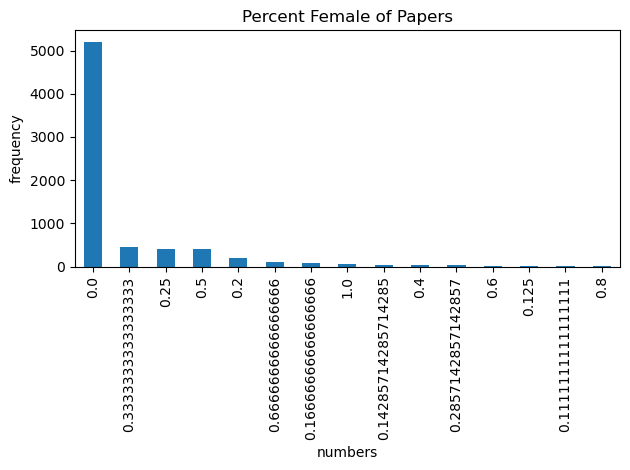

In [39]:
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df_rr_all_features['gender_percent'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency',title='Percent Female of Papers')

plt.show()

# Submission Level data

In [40]:
def lambda_get_first_last_author(row):
    first_author_name = str()
    first_author_id = str()
    last_author_name = str()
    last_author_id = str()
    try:
        lst_names = ast.literal_eval(row['authors'])
        lst_ids = ast.literal_eval(row['authorids'])
        first_author_name = lst_names[0]
        last_author_name = lst_names[-1]
        first_author_id = lst_ids[0]
        last_author_id = lst_ids[-1]
    except:
        first_author_name = 'error'
        last_author_name = 'error'
        first_author_id = 'error'
        last_author_id = 'error'
        
    return first_author_name, last_author_name, first_author_id, last_author_id

df_submissions[['first_author_name','last_author_name','first_author_email','last_author_email']] = df_submissions.apply(lambda x: lambda_get_first_last_author(x), axis = 1 , result_type='expand')

df_submissions.to_csv('../data/submissions/df_submissions.csv')

In [41]:
df_submissions['gender_percent'] = df_submissions.progress_apply(lambda x: perecent_female_author(x),axis = 1)
df_submissions['last_author_gender'] = df_submissions.progress_apply(lambda x: get_last_author_gender(x),axis = 1)
df_submissions['first_author_gender'] = df_submissions.progress_apply(lambda x: get_first_author_gender(x),axis = 1)

df_submissions.to_csv('../data/submissions/df_submissions.csv', index=False)

  8%|██▉                                   | 218/2820 [00:00<00:02, 1108.08it/s]

larsson@cs.uchicago.edu   male
mmaire@ttic.edu   male
greg@ttic.edu   male
schsam@google.com   male
gilmer@google.com   male
sganguli@stanford.edu   male
jaschasd@google.com   male
cesar.laurent@umontreal.ca   male
nicolas.ballas@umontreal.ca   unspecified
pmolchanov@nvidia.com   male
styree@nvidia.com   male
tkarras@nvidia.com   male
taila@nvidia.com   male
jkautz@nvidia.com   unspecified
tim.cooijmans@umontreal.ca   male
nicolas.ballas@umontreal.ca   unspecified
ashwinkv@vt.edu   male
cogswell@vt.edu   male
ram21@vt.edu   male
sunqing@vt.edu   female
steflee@vt.edu   male
djcran@indiana.edu   male
dbatra@vt.edu   male
irinah@google.com   female
lmatthey@google.com   male
arkap@google.com   unspecified
gqzhong@ouc.edu.cn   male
ouczyc@outlook.com   male
sdrzbruce@163.com   unspecified
eracah@lbl.gov   male
zhiliny@cs.cmu.edu   male
bdhingra@andrew.cmu.edu   male
tzhao@uwm.edu   male
xiaobing@uwm.edu   male
ycao@cs.uml.edu   male
hadavid@google.com   male
adai@google.com   male
qvl@goo

 25%|█████████▌                            | 709/2820 [00:00<00:01, 1186.27it/s]

sanjaygana@gmail.com   unspecified
mp2893@gatech.edu   male
bahadori@gatech.edu   unspecified
zxie@cs.stanford.edu   unspecified
feser@csail.mit.edu   male
mabrocks@microsoft.com   male
shilei06@baidu.com   male
fengshikun01@baidu.com   male
zhuzhifan@baidu.com   unspecified
adosovitskiy@gmail.com   unspecified
armen.ag@live.com   unspecified
marcin@openai.com   male
kkurach@google.com   male
lgsanchez@cs.miami.edu   male
yhechtli@andrew.cmu.edu   male
pchakrav@andrew.cmu.edu   female
jiningq@andrew.cmu.edu   male
giambattista.parascandolo@tut.fi   male
heikki.huttunen@tut.fi   unspecified
aryk.anderson@eagles.ewu.edu   unspecified
stefanc@kth.se   male
azizpour@kth.se   male
razavian@kth.se   unspecified
rasool.fakoor@mavs.uta.edu   male
asamir@microsoft.com   male
margarmitchell@gmail.com   female
edwin.webmail@gmail.com   male
forresti@eecs.berkeley.edu   unspecified
nicolas@le-roux.name   male
sajid@dsp.snu.ac.kr   male
wysung@snu.ac.kr   unspecified
gurban@uci.edu   male
k.j.geras

 33%|████████████▋                         | 944/2820 [00:00<00:01, 1141.58it/s]

14302010017@fudan.edu.cn   unspecified
liam.fedus@gmail.com   unspecified
swabha@cs.cmu.edu   female
aparikh@google.com   male
tomkwiat@google.com   male
victor.campos@bsc.es   male
bjou@google.com   male
xavier.giro@upc.edu   male
jordi.torres@bsc.es   unspecified
vsv1g12@soton.ac.uk   unspecified
kbwang@ucdavis.edu   unspecified
han.zhao@cs.cmu.edu   male
shanghaz@andrew.cmu.edu   female
guanhanw@andrew.cmu.edu   unspecified
corentin.tallec@polytechnique.edu   unspecified
alexpeys@gmail.com   male
alerer@fb.com   male
emilio.balda@ti.rwth-aachen.de   male
arash.behboodi@ti.rwth-aachen.de   male
mathar@ti.rwth-aachen.de   unspecified
ronlevie@gmail.com   unspecified
abhagoji@princeton.edu   male
_w@eecs.berkeley.edu   male
lxbosky@gmail.com   female
dawnsong@gmail.com   unspecified
nkamra@usc.edu   male
umanggup@usc.edu   unspecified
ben.krause@ed.ac.uk   male
e.kahembwe@ed.ac.uk   unspecified
kmuruges@cs.cmu.edu   male
jgc@cs.cmu.edu   male
mghasemzadeh@ucsd.edu   male
msamragh@ucsd.

 42%|███████████████▍                     | 1172/2820 [00:01<00:01, 1117.21it/s]

heinzedeml@stat.math.ethz.ch   female
meinshausen@stat.math.ethz.ch   male
hammj@cse.ohio-state.edu   male
chenjie@us.ibm.com   unspecified
cubuk@google.com   male
barretzoph@google.com   unspecified
phpchen@ucdavis.edu   unspecified
siddharthkumar@upwork.com   unspecified
mike.sk.traynor@gmail.com   unspecified
cijo.jose@idiap.ch   male
moustaphacisse@fb.com   male
francois.fleuret@idiap.ch   male
thanard.kurutach@berkeley.edu   male
iclavera@berkeley.edu   unspecified
jsyoon0823@gmail.com   male
zame@econ.ucla.edu   male
mihaela.vanderschaar@oxford-man.ox.ac.uk   male
choij@us.ibm.com   male
hxu48@uic.edu   male
liub@uic.edu   male
lshu3@uic.edu   female
psyu@uic.edu   male
petar.velickovic@cst.cam.ac.uk   male
gcucurull@gmail.com   unspecified
taesung.lee@ibm.com   male
young_park@us.ibm.com   unspecified
jhoffman@eecs.berkeley.edu   female
etzeng@eecs.berkeley.edu   male
taesung_park@berkeley.edu   male
xxu@hmc.edu   female
taowei@buffalo.edu   male
wangchanghu@toutiao.com   male
c

 57%|█████████████████████▏               | 1614/2820 [00:01<00:01, 1046.62it/s]

maithrar@gmail.com   female
alexirpan@google.com   male
j.d.andreas@gmail.com   male
rdk@cs.cornell.edu   male
qvl@google.com   male
kleinber@cs.cornell.edu   unspecified
tsuzuku@ms.k.u-tokyo.ac.jp   male
imachi@preferred.jp   unspecified
g.french@uea.ac.uk   male
m.mackiewicz@uea.ac.uk   unspecified
cohennadav@ias.edu   male
ronent@cs.huji.ac.il   male
shashua@cs.huji.ac.il   male
sungyons@usc.edu   male
mohegh@usc.edu   unspecified
alec@openai.com   unspecified
cruvadom@gmail.com   male
sivan.sabato@gmail.com   female
bjoern.schuller@imperial.ac.uk   male
brenden@nyu.edu   male
marco.baroni@unitn.it   male
mcmahan@google.com   male
dramage@google.com   unspecified
rrwiyatn@uwaterloo.ca   male
jorchard@uwaterloo.ca   male
teye@kth.se   unspecified
tuananh@robots.ox.ac.uk   male
maximilian.igl@gmail.com   male
twgr@robots.ox.ac.uk   male
tom@jin.me.uk   male
fwood@robots.ox.ac.uk   male
karanraj.grewal@mail.utoronto.ca   male
erroneus@gmail.com   male
yoshua.umontreal@gmail.com   male


 65%|███████████████████████▉             | 1824/2820 [00:01<00:00, 1029.88it/s]

elad.hoffer@gmail.com   male
itayhubara@gmail.com   male
giladiniv@gmail.com   unspecified
ikyhn1.ken.n@gmail.com   male
ichi@preferred.jp   male
miyato@preferred.jp   male
masomatics@preferred.jp   unspecified
bichen@berkeley.edu   male
alex.lacoste.shmu@gmail.com   male
boris@elementai.com   male
wonchang@elementai.com   unspecified
1500012783@pku.edu.cn   male
zhdeng@pku.edu.cn   male
nie@iro.umontreal.ca   male
jian.tang@hec.ca   unspecified
f.pardo@imperial.ac.uk   male
v.levdik@imperial.ac.uk   unspecified
wenhuchen@ucsb.edu   male
yilin.shen@samsung.com   male
william@cs.ucsb.edu   male
hongxia.jin@samsung.com   female
xinqicham@gmail.com   male
ming.hou@riken.jp   male
gx.zhou@gdut.edu.cn   unspecified
sidak.singh@epfl.ch   unspecified
izzeddingur@gmail.com   unspecified
coallaoh@linecorp.com   male
agallagher@google.com   unspecified
mbchang@berkeley.edu   male
abhigupta@berkeley.edu   male
svlevine@eecs.berkeley.edu   male
tom_griffiths@berkeley.edu   unspecified
z.daniel.guo

 80%|█████████████████████████████▍       | 2248/2820 [00:02<00:00, 1005.35it/s]

wkong37@gatech.edu   male
cvliaw@cs.ubc.ca   male
aranyak@google.com   unspecified
sheng.jia@mail.utoronto.ca   unspecified
swmo@kaist.ac.kr   male
mscho@postech.ac.kr   male
jinwoos@kaist.ac.kr   male
georgeycliu@gmail.com   male
14wuzheng@sjtu.edu.cn   male
daniel_ritchie@brown.edu   male
billf@mit.edu   male
jbt@mit.edu   unspecified
baykal@mit.edu   male
lucasl@mit.edu   male
igilitschenski@mit.edu   male
engstrom@mit.edu   male
btran115@mit.edu   male
tsipras@mit.edu   male
ludwigs@mit.edu   male
madry@mit.edu   male
hyunwooj@kaist.ac.kr   male
mshan92@kaist.ac.kr   male
zzxc1133@kaist.ac.kr   male
sjhwang82@kaist.ac.kr   male
rongge@cs.duke.edu   male
sham@cs.washington.edu   male
rkidambi@uw.edu   male
praneeth@microsoft.com   male
deemishra21@gmail.com   male
prathoshap@gmail.com   male
maxaravind@gmail.com   male
getprashant57@gmail.com   male
santanuc@ee.iitd.ac.in   unspecified
anirudhgoyal9119@gmail.com   male
riashat.islam@mail.mcgill.ca   male
danieljstrouse@gmail.com   u

 92%|█████████████████████████████████▉   | 2586/2820 [00:02<00:00, 1082.13it/s]

srallapalli@us.ibm.com   unspecified
xiesirui@sensetime.com   male
huangjunning@sensetime.com   male
jungao@cs.toronto.edu   male
dihe@microsoft.com   male
xu.tan@microsoft.com   male
taoqin@microsoft.com   male
wanglw@cis.pku.edu.cn   male
tyliu@microsoft.com   male
jordi@prowler.io   male
felix@prowler.io   male
peter@prowler.io   male
nagaban2@berkeley.edu   female
iclavera@berkeley.edu   unspecified
mayban@waymo.com   male
akrizhevsky@gmail.com   unspecified
williamd4112@gapp.nthu.edu.tw   male
kedar@google.com   unspecified
iliu3@illinois.edu   male
jianpeng@illinois.edu   male
aschwing@illinois.edu   unspecified
zivg@mit.edu   male
danro@google.com   male
fbesse@google.com   unspecified
smsxgz@pku.edu.cn   unspecified
lmetz@google.com   male
nirum@google.com   male
bcheung@berkeley.edu   male
jaschasd@google.com   male
houjikai@pku.edu.cn   male
hackyhuang@pku.edu.cn   male
zhzhang@math.pku.edu.cn   male
arbaazk@seas.upenn.edu   male
vijay.kumar@seas.upenn.edu   male
aribeiro@sea

100%|█████████████████████████████████████| 2820/2820 [00:02<00:00, 1091.56it/s]


xingguol@princeton.edu   male
junweilu@hsph.harvard.edu   male
zhaoranwang@gmail.com   unspecified
amartya.sanyal@cs.ox.ac.uk   male
varunk@cs.ox.ac.uk   male
philip.torr@eng.ox.ac.uk   unspecified
zhengningyuan@qq.com   male
winhehe@163.com   female
djhuang@dase.ecnu.edu.cn   male
melisgl@google.com   male
cblundell@google.com   unspecified
l.maziarka@gmail.com   male
marek.smieja@uj.edu.pl   male
aknoow@gmail.com   female
jacek.tabor@uj.edu.pl   male
lukasz.struski@uj.edu.pl   male
przemyslaw.spurek@uj.edu.pl   male
wwball34@gmail.com   unspecified
carlos.rosarkoslassance@imt-atlantique.fr   male
vincent.gripon@imt-atlantique.fr   male
antonio.ortega@ee.usc.edu   male
brutzkus@gmail.com   male
guxiaodong1987@126.com   male
kyunghyun.cho@nyu.edu   male
jungwoo.ha@navercorp.com   male
hunkim@cse.ust.hk   male
mr.zhihao.li@gmail.com   male
motoyoshi@idr.ias.sci.waseda.ac.jp   unspecified
titouan.parcollet@alumni.univ-avignon.fr   male
mirco.ravanelli@gmail.com   male
mohamed.morchid@uni

100%|█████████████████████████████████████| 2820/2820 [00:01<00:00, 2688.42it/s]


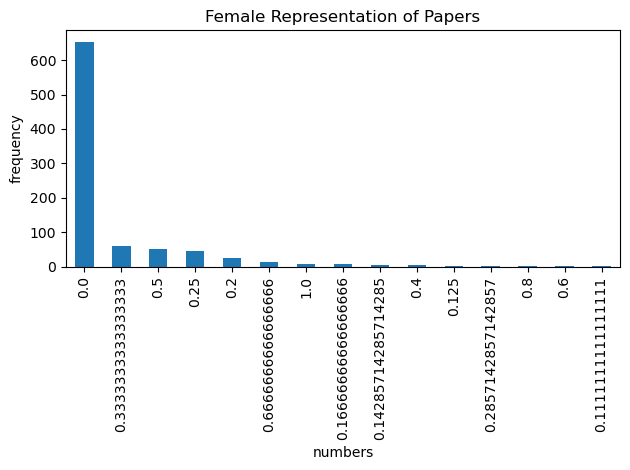

In [47]:
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df_submissions['gender_percent'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency',title='Female Representation of Papers')

plt.show()

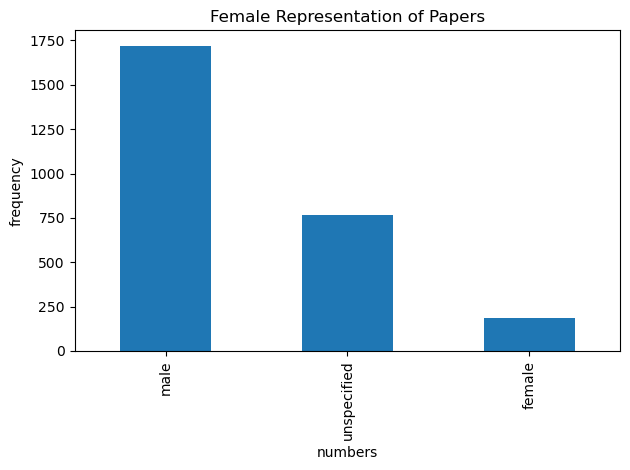

In [48]:
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df_submissions['last_author_gender'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency',title='Female Representation of Papers')

plt.show()

In [59]:
str_2017 = 'ICLR.cc/2017/conference/-/submission'
str_2018 = 'ICLR.cc/2018/Conference/-/Blind_Submission'
str_2019 = 'ICLR.cc/2019/Conference/-/Blind_Submission'


df_submissions_2017 = df_submissions[df_submissions['invitation'] == str_2017]
df_submissions_2018 = df_submissions[df_submissions['invitation'] == str_2018]
df_submissions_2019 = df_submissions[df_submissions['invitation'] == str_2019]


df_submissions_2017['title'] = df_submissions_2017['title'].str.lower()
df_submissions_2018['title'] = df_submissions_2018['title'].str.lower()
df_submissions_2019['title'] = df_submissions_2019['title'].str.lower()

/var/folders/v9/8whxr3fd1mv_pwkjh0kn920m0000gn/T/ipykernel_71981/4089849684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submissions_2017['title'] = df_submissions_2017['title'].str.lower()
/var/folders/v9/8whxr3fd1mv_pwkjh0kn920m0000gn/T/ipykernel_71981/4089849684.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submissions_2018['title'] = df_submissions_2018['title'].str.lower()
/var/folders/v9/8whxr3fd1mv_pwkjh0kn920m0000gn/T/ipykernel_71981/4089849684.py:13: SettingWithCopyWarning: 
A 

In [62]:
df_submissions_2017.merge(df_submissions_2018, how='inner', on='title')


df_submissions_2018.merge(df_submissions_2019, how='inner', on='title')

Unnamed: 0_x       id_x original_x  number_x       cdate_x  mdate_x  \
0           530  SyBBgXWAZ  HJbJe7-Cb      1101  1.518730e+12      NaN   
1           542  SJvu-GW0b  HkL_bGWA-       777  1.518730e+12      NaN   
2           956  Bya8fGWAZ  H1h8MG-AW       792  1.518730e+12      NaN   
3          1088  HyBbjW-RW  S1LejWW0b       708  1.518730e+12      NaN   
4          1174  S1Y7OOlRZ  HyYQO_gCZ       312  1.518730e+12      NaN   

        tcdate_x       tmdate_x  ddate_x    forum_x  ...  author_emails_y  \
0  1509138495670  1644492600111      NaN  SyBBgXWAZ  ...              NaN   
1  1509134702756  1518730165569      NaN  SJvu-GW0b  ...              NaN   
2  1509134933264  1518730164999      NaN  Bya8fGWAZ  ...              NaN   
3  1509133053452  1518730167722      NaN  HyBbjW-RW  ...              NaN   
4  1509095457529  1518730182110      NaN  S1Y7OOlRZ  ...              NaN   

  code_y  data_y              first_author_name_y last_author_name_y  \
0    NaN     NaN                Eirikur Agustsson       Luc Van Gool   
1    NaN     NaN  Shaileshh Bojja Venkatakrishnan   Pramod Viswanath   
2    NaN     NaN                  Nantas Nardelli    Nicolas Usunier   
3    NaN     NaN                      Jesse Dodge         Noah Smith   
4    NaN     NaN                          Liam Li    Ameet Talwalkar   

         first_author_email_y        last_author_email_y  gender_percent_y  \
0  aeirikur@vision.ee.ethz.ch  vangool@vision.ee.ethz.ch               NaN   
1       bjjvnkt@csail.mit.edu       pramodv@illinois.edu               NaN   
2      nantas@robots.ox.ac.uk             usunier@fb.com               0.0   
3           jessed@cs.cmu.edu  nasmith@cs.washington.edu               0.0   
4  jamieson@cs.washington.edu          talwalkar@cmu.edu               0.0   

  last_author_gender_y first_author_gender_y  
0          unspecified           unspecified  
1                 male           unspecified  
2          unspecified                  male  
3                 male                  male  
4                 male                  male  

[5 rows x 79 columns]

# Repeat Authors

In [67]:
df_authors_2017 = df_author_profiles[df_author_profiles['year'] == 2017]
df_authors_2018 = df_author_profiles[df_author_profiles['year'] == 2018]
df_authors_2019 = df_author_profiles[df_author_profiles['year'] == 2019]

In [70]:
df_repeat_authors = df_authors_2017.merge(df_authors_2017, how='inner', on='id')
df_repeat_authors = df_repeat_authors.merge(df_authors_2019, how='inner', on='id')
df_repeat_authors.to_csv('../data/authors/df_repeat_author_profiles.csv')